# 1-Courses usagers :

In [312]:
import pandas as pd

def preparer_donnees_courses_usagers(fichier_csv, sep=",", encoding="utf-8"):
    """
    Charge et nettoie un fichier de courses usagers Vélib'.
    Retourne un DataFrame enrichi et prêt pour analyse.
    """
    # Chargement du fichier
    df = pd.read_csv(fichier_csv, sep=sep, encoding=encoding)

    # Nettoyage des noms de colonnes
    df.columns = df.columns.str.strip().str.lower()
    df.columns = df.columns.str.replace(" ", "_")

    # Conversion des dates
    df['date_depart'] = pd.to_datetime(df['date_depart'], errors='coerce')
    df['date_arrive'] = pd.to_datetime(df['date_arrive'], errors='coerce')

    # Suppression des lignes avec dates invalides
    df = df.dropna(subset=['date_depart', 'date_arrive'])

    # Variables enrichies
    df['durée_min'] = df['duration'] / 60
    df['heure_depart'] = df['date_depart'].dt.hour
    df['jour_semaine'] = df['date_depart'].dt.day_name(locale='fr_FR')
    df['jour'] = df['date_depart'].dt.date
    df['mois'] = df['date_depart'].dt.month
    df['type_velo'] = df['is_vae'].map({True: 'électrique', False: 'mécanique'})

    return df


In [313]:
# Fichier de février 
df_fevrier = preparer_donnees_courses_usagers(
    fichier_csv="~/Downloads/14-Hackathon/01_Courses_usagers/2023_02/All_data_courses.csv",
    sep=";",
    encoding="utf-8"
)

# Fichier de juin 
df_juin = preparer_donnees_courses_usagers(
    fichier_csv="~/Downloads/14-Hackathon/01_Courses_usagers/2023_06/All_data_courses_usagers_06_2023.csv",
    sep=",",
    encoding="utf-8"
)

In [316]:
def afficher_trafic_par_heure(df, mois_nom):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 4))
    sns.countplot(x='heure_depart', data=df, palette='crest')
    plt.title(f"Nombre de trajets par heure - {mois_nom}")
    plt.xlabel("Heure de départ")
    plt.ylabel("Nombre de trajets")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


In [318]:
def afficher_trafic_par_jour(df, mois_nom):
    import matplotlib.pyplot as plt
    import seaborn as sns

    jours_ordre = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    
    plt.figure(figsize=(10, 4))
    sns.countplot(x='jour_semaine', data=df, order=jours_ordre, hue='jour_semaine', palette='viridis', legend=False)
    plt.title(f"Nombre de trajets par jour de la semaine - {mois_nom}")
    plt.xlabel("Jour")
    plt.ylabel("Nombre de trajets")
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


In [320]:
def afficher_heatmap_trafic(df, mois_nom):
    import matplotlib.pyplot as plt
    import seaborn as sns

    jours_ordre = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    
    # Création du tableau croisé
    heat_data = df.groupby(['heure_depart', 'jour_semaine']).size().unstack().reindex(columns=jours_ordre)

    plt.figure(figsize=(6, 4))
    sns.heatmap(heat_data, cmap='YlGnBu')
    plt.title(f"Trafic horaire par jour de la semaine - {mois_nom}")
    plt.xlabel("Jour de la semaine")
    plt.ylabel("Heure de départ")
    plt.tight_layout()
    plt.show()


/var/folders/v4/mq90pf9s04g995xgrt9dp8qh0000gn/T/ipykernel_71765/1000973906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heure_depart', data=df, palette='crest')


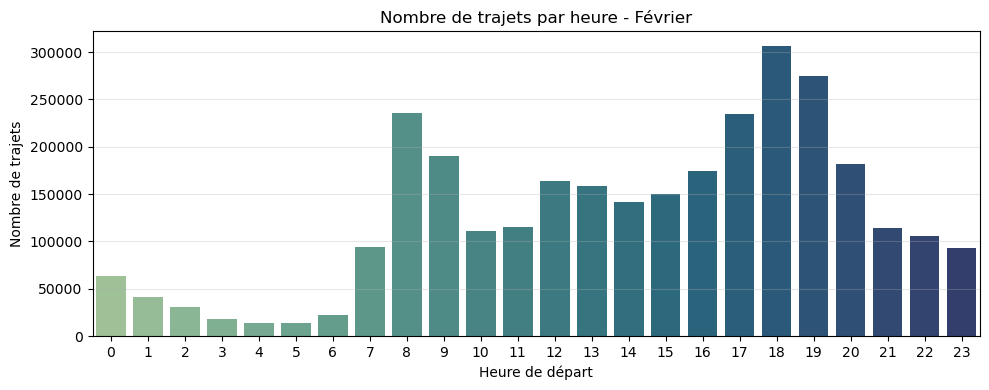

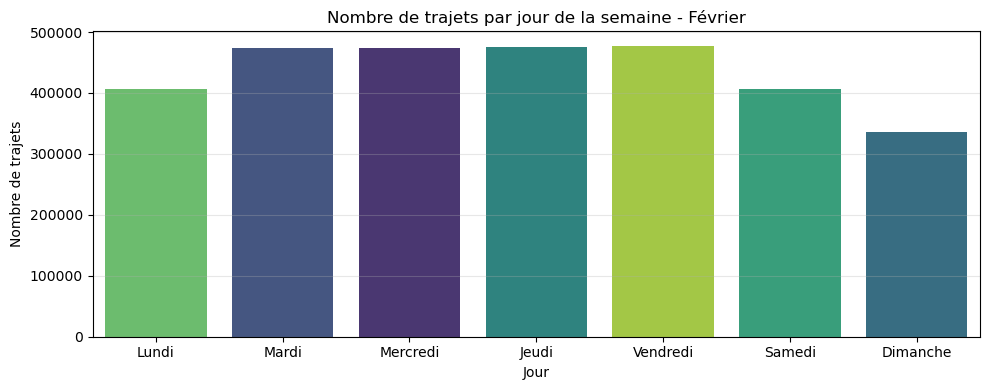

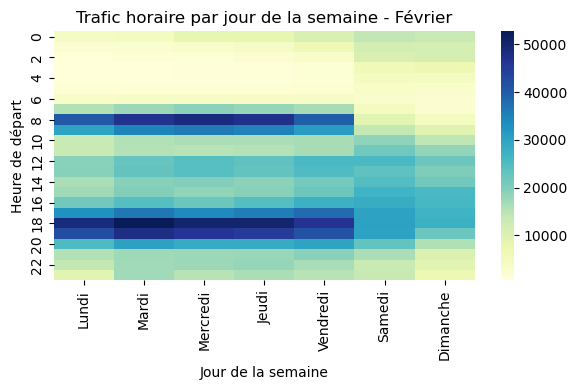

/var/folders/v4/mq90pf9s04g995xgrt9dp8qh0000gn/T/ipykernel_71765/1000973906.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heure_depart', data=df, palette='crest')


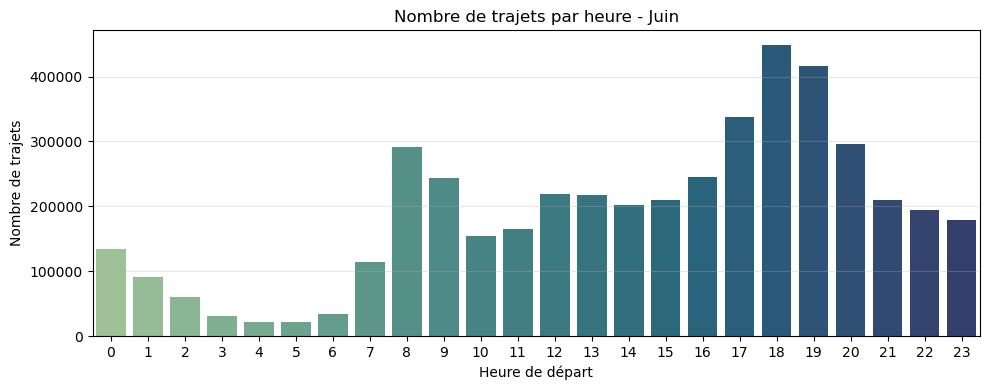

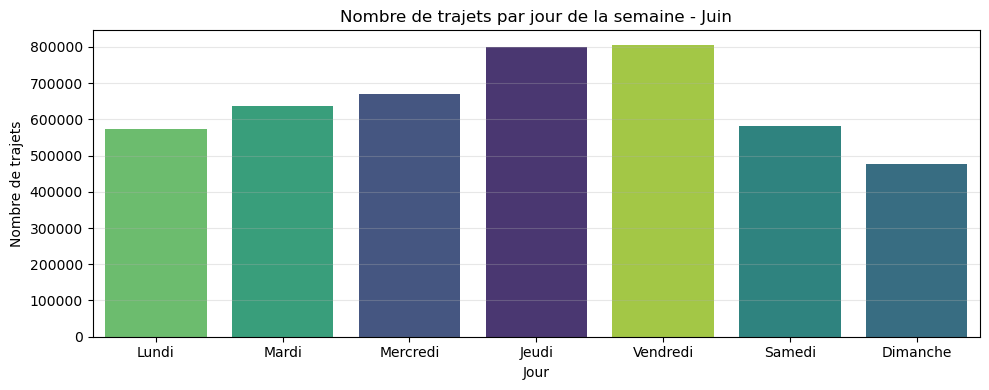

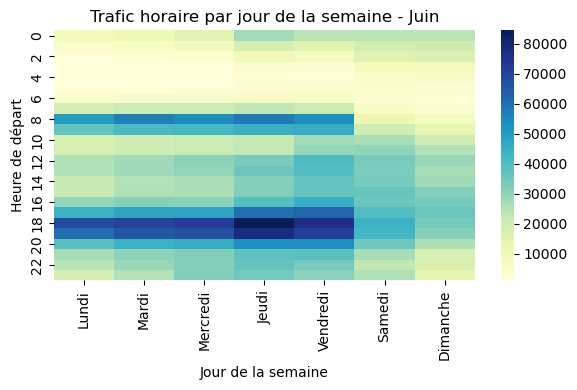

In [322]:
afficher_trafic_par_heure(df_fevrier, "Février")
afficher_trafic_par_jour(df_fevrier, "Février")
afficher_heatmap_trafic(df_fevrier, "Février")

afficher_trafic_par_heure(df_juin, "Juin")
afficher_trafic_par_jour(df_juin, "Juin")
afficher_heatmap_trafic(df_juin, "Juin")


In [125]:
def analyser_desequilibres(df, mois_nom, top_n=20):
    print(f"\n Déséquilibres structurels – {mois_nom.upper()}")

    # Nombre de départs et d'arrivées par station
    departs = df['from_stat'].value_counts()
    arrivees = df['to_stat'].value_counts()

    # Jointure sur toutes les stations
    stations = pd.DataFrame({
        'Départs': departs,
        'Arrivées': arrivees
    }).fillna(0)

    stations['Déséquilibre'] = stations['Arrivées'] - stations['Départs']

    # Stations à fort déséquilibre positif (trop d’arrivées)
    surplus_arrivees = stations.sort_values('Déséquilibre', ascending=False).head(top_n)

    # Stations à fort déséquilibre négatif (trop de départs)
    surplus_departs = stations.sort_values('Déséquilibre').head(top_n)

    print("\nStations avec surplus d’arrivées :")
    print(surplus_arrivees)

    print("\nStations avec surplus de départs :")
    print(surplus_departs)


In [127]:
analyser_desequilibres(df_fevrier, "Février")
analyser_desequilibres(df_juin, "Juin")



 Déséquilibres structurels – FÉVRIER

Stations avec surplus d’arrivées :
                                      Départs  Arrivées  Déséquilibre
Gambetta - Saint Fargeau               1717.0    2223.0         506.0
Belleville - Pyrénées                  1899.0    2363.0         464.0
Pré Saint-Gervais - Lilas              1161.0    1601.0         440.0
Gambetta - Père Lachaise               2601.0    3038.0         437.0
Cimetière d'Issy-les-Moulineaux         537.0     953.0         416.0
Jean Moulin - Paul Doumer               743.0    1154.0         411.0
Jourdain - Place des Grandes Rigoles   2358.0    2763.0         405.0
Charles Gide - Fort de Bicêtre          630.0    1009.0         379.0
Mairie du 20ème                        2592.0    2971.0         379.0
Porte des Lilas - Faidherbe            1027.0    1383.0         356.0
Square du Théâtre du Garde-Chasse      1279.0    1634.0         355.0
Ménilmontant - Pelleport               1141.0    1495.0         354.0
Dupont de l'Eure

In [129]:
def plot_desequilibres(stations_df, mois_nom, top_n=10):
    import matplotlib.pyplot as plt

    # Sélection des top déséquilibres positifs et négatifs
    top_arrivees = stations_df.sort_values('Déséquilibre', ascending=False).head(top_n)
    top_departs = stations_df.sort_values('Déséquilibre').head(top_n)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Barplot : surplus d’arrivées
    axes[0].barh(top_arrivees.index[::-1], top_arrivees['Déséquilibre'][::-1], color='seagreen')
    axes[0].set_title(f"Top {top_n} stations à surplus d'arrivées – {mois_nom}")
    axes[0].set_xlabel("Déséquilibre (arrivées - départs)")

    # Barplot : surplus de départs
    axes[1].barh(top_departs.index[::-1], top_departs['Déséquilibre'][::-1], color='salmon')
    axes[1].set_title(f"Top {top_n} stations à surplus de départs – {mois_nom}")
    axes[1].set_xlabel("Déséquilibre (arrivées - départs)")

    plt.tight_layout()
    plt.show()


In [132]:
def preparer_desequilibres(df):
    departs = df['from_stat'].value_counts()
    arrivees = df['to_stat'].value_counts()

    stations_df = pd.DataFrame({
        'Départs': departs,
        'Arrivées': arrivees
    }).fillna(0)

    stations_df['Déséquilibre'] = stations_df['Arrivées'] - stations_df['Départs']
    return stations_df



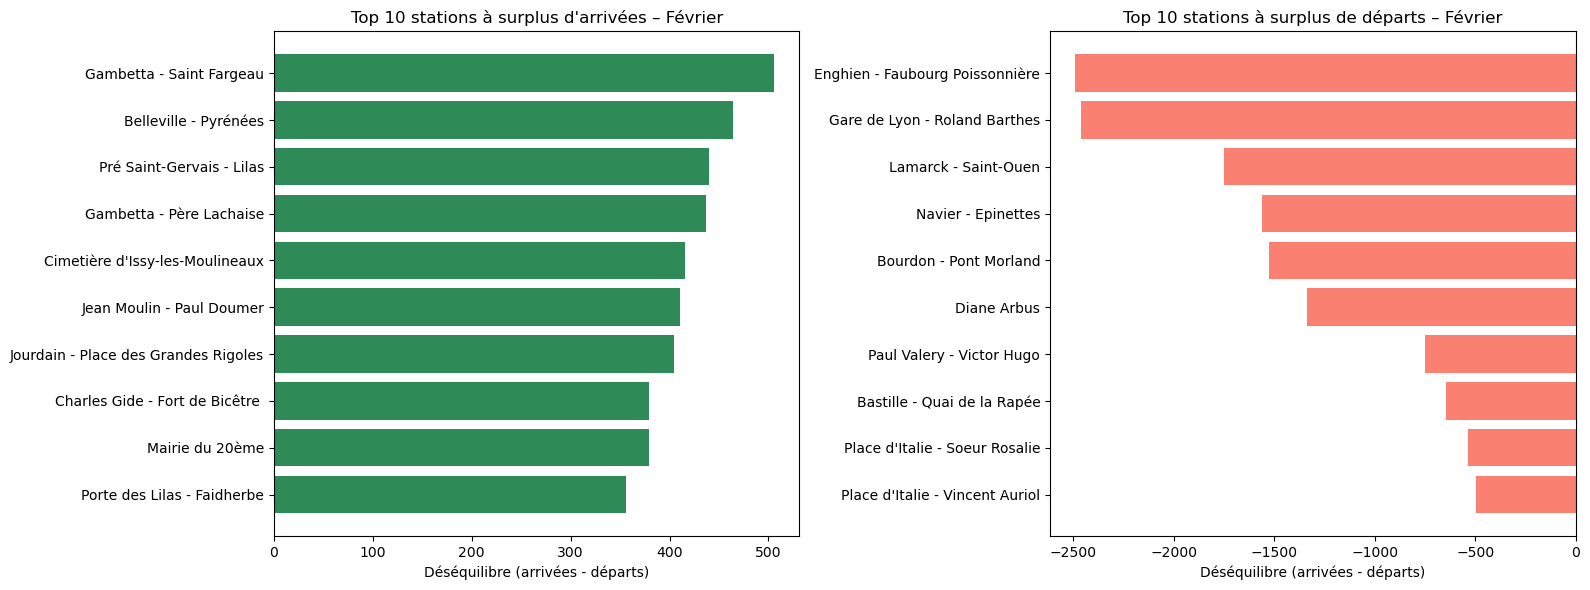

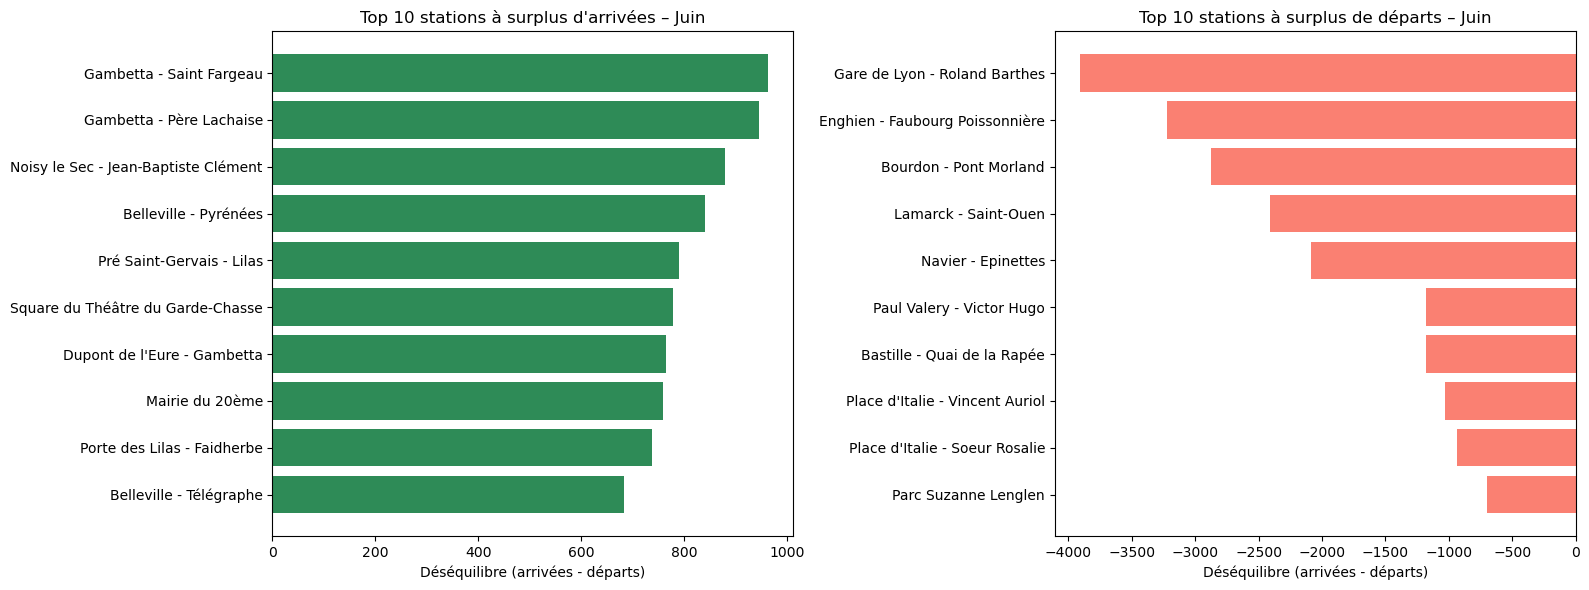

In [135]:
stations_fev = preparer_desequilibres(df_fevrier)
stations_juin = preparer_desequilibres(df_juin)

plot_desequilibres(stations_fev, "Février")
plot_desequilibres(stations_juin, "Juin")

In [138]:
def afficher_stats_globales(df, mois_nom):
    print(f"\n Statistiques globales – {mois_nom}")
    stats = df.groupby('type_velo')[['durée_min', 'distance']].describe()
    print(stats.loc[:, (slice(None), ['mean', 'std', 'min', 'max'])].round(2))



In [140]:
afficher_stats_globales(df_fevrier, "Février")
afficher_stats_globales(df_juin, "Juin")



 Statistiques globales – Février
           durée_min                         distance                         
                mean     std  min        max     mean      std    min      max
type_velo                                                                     
mécanique      15.12  220.13  3.0  156871.28  2670.08  1889.31  100.0  81180.0
électrique     17.85  338.97  3.0  356626.67  3685.53  2530.57  100.0  55333.0

 Statistiques globales – Juin
           durée_min                         distance                         
                mean     std  min        max     mean      std    min      max
type_velo                                                                     
mécanique      16.46  201.50  3.0  129111.85  2784.47  2048.99  100.0  73901.0
électrique     19.29  165.06  3.0   99981.38  3835.21  2689.82  100.0  71227.0


In [148]:
import seaborn as sns
def plot_duree_moyenne_par_heure(df, mois_nom):
    moyenne_duree = df.groupby(['heure_depart', 'type_velo'])['durée_min'].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=moyenne_duree, x='heure_depart', y='durée_min', hue='type_velo')
    plt.title(f"Durée moyenne des trajets par heure – {mois_nom}")
    plt.xlabel("Heure de départ")
    plt.ylabel("Durée moyenne (min)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()



In [150]:
import seaborn as sns
def plot_distance_moyenne_par_heure(df, mois_nom):
    moyenne_dist = df.groupby(['heure_depart', 'type_velo'])['distance'].mean().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=moyenne_dist, x='heure_depart', y='distance', hue='type_velo')
    plt.title(f"Distance moyenne des trajets par heure – {mois_nom}")
    plt.xlabel("Heure de départ")
    plt.ylabel("Distance moyenne (mètres)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


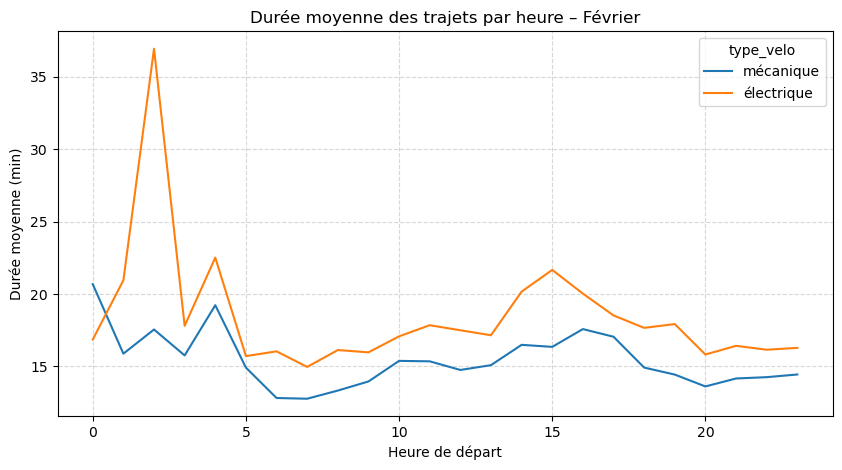

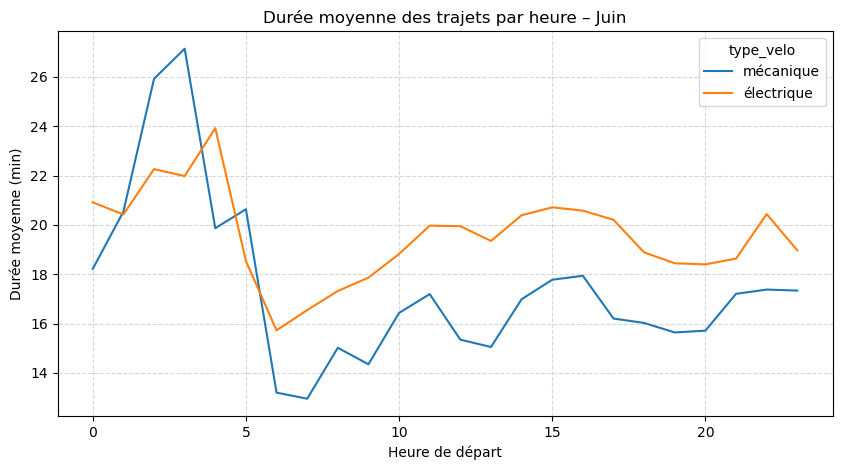

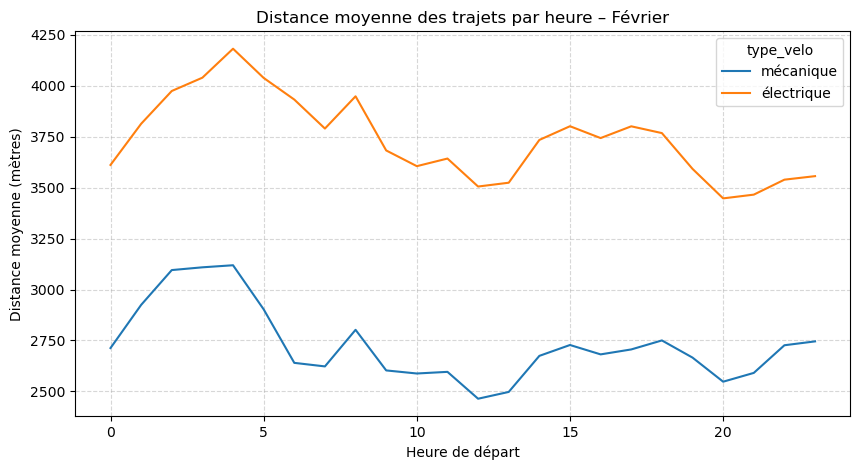

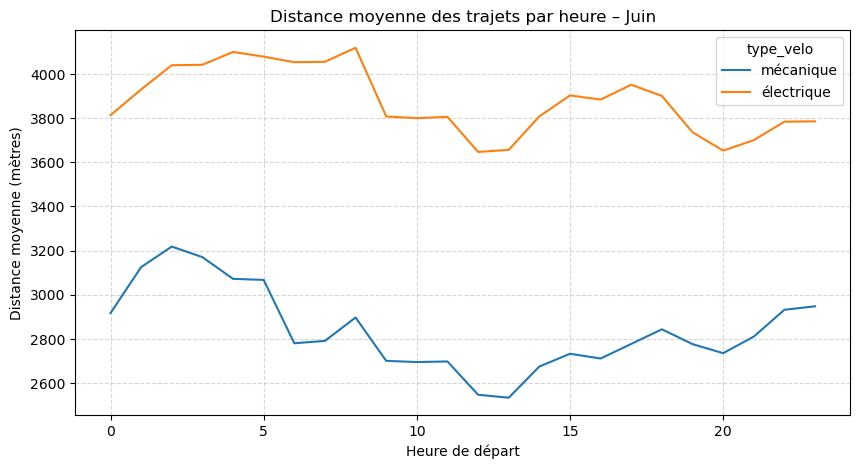

In [152]:
plot_duree_moyenne_par_heure(df_fevrier, "Février")
plot_duree_moyenne_par_heure(df_juin, "Juin")

plot_distance_moyenne_par_heure(df_fevrier, "Février")
plot_distance_moyenne_par_heure(df_juin, "Juin")


In [154]:
def typologie_stations(df, mois):
    matin = df[df['heure_depart'].between(6, 10)]
    soir = df[df['heure_depart'].between(17, 20)]

    nb_depart_matin = matin['from_stat'].value_counts().rename("nb_depart_matin")
    nb_arrivee_soir = soir['to_stat'].value_counts().rename("nb_arrivee_soir")

    stats = pd.concat([nb_depart_matin, nb_arrivee_soir], axis=1).fillna(0)
    stats["score"] = stats["nb_arrivee_soir"] - stats["nb_depart_matin"]
    stats["profil"] = stats["score"].apply(
        lambda x: "Arrivée typique du soir" if x > 0 else "Départ typique du matin"
    )
    stats = stats.sort_values("score")

    plt.figure(figsize=(10, 6))
    sns.barplot(data=stats.reset_index().head(10), x="score", y="index", hue="profil", dodge=False)
    plt.axvline(0, color="grey", linestyle="--")
    plt.title(f"Typologie des stations - {mois}")
    plt.xlabel("Score (arrivées soir - départs matin)")
    plt.ylabel("Station")
    plt.tight_layout()
    plt.show()

    return stats


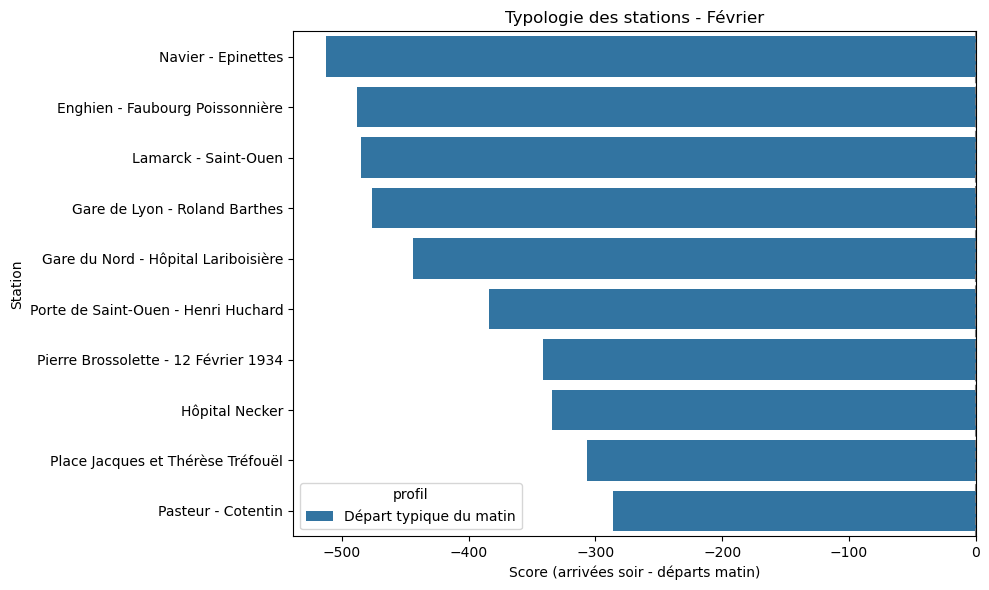

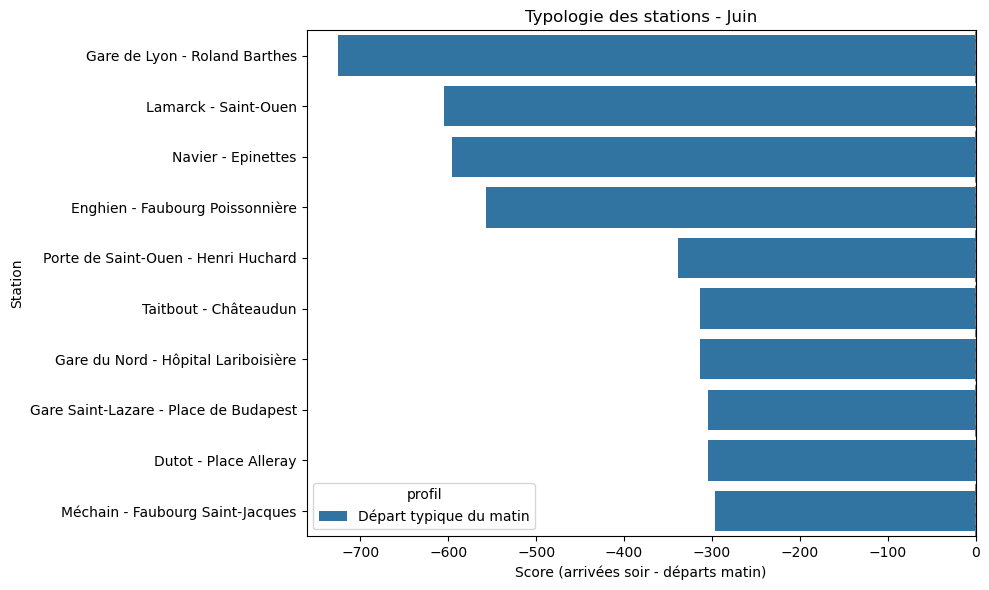

,nb_depart_matin,nb_arrivee_soir,score,profil
Gare de Lyon - Roland Barthes,725.0,0.0,-725.0,Départ typique du matin
Lamarck - Saint-Ouen,605.0,0.0,-605.0,Départ typique du matin
Navier - Epinettes,596.0,0.0,-596.0,Départ typique du matin
Enghien - Faubourg Poissonnière,557.0,0.0,-557.0,Départ typique du matin
Porte de Saint-Ouen - Henri Huchard,700.0,361.0,-339.0,Départ typique du matin
...,...,...,...,...
Saint-Antoine Sévigné,1481.0,4045.0,2564.0,Arrivée typique du soir
Pau Casals - Neuve Tolbiac,1163.0,4048.0,2885.0,Arrivée typique du soir
Constantine - Université,731.0,3669.0,2938.0,Arrivée typique du soir
Pont Neuf - Rivoli,1191.0,4133.0,2942.0,Arrivée typique du soir


In [156]:
typologie_stations(df_fevrier, "Février")
typologie_stations(df_juin, "Juin")


In [158]:
def afficher_statuts_stations(df, mois_nom):
    print(f"\n Statuts de stations — {mois_nom.upper()}")

    # Statuts au départ
    print("\n Statuts au départ :")
    print(df['start_station_status'].value_counts(dropna=False))

    # Statuts à l'arrivée
    print("\n Statuts à l’arrivée :")
    print(df['end_station_status'].value_counts(dropna=False))


In [160]:
afficher_statuts_stations(df_fevrier, "Février")
afficher_statuts_stations(df_juin, "Juin")



 Statuts de stations — FÉVRIER

 Statuts au départ :
start_station_status
NORMALE    2981131
PLEINE       67659
VIDE          1124
Name: count, dtype: int64

 Statuts à l’arrivée :
end_station_status
NORMALE    2964272
VIDE         83301
PLEINE        2341
Name: count, dtype: int64

 Statuts de stations — JUIN

 Statuts au départ :
start_station_status
NORMALE    4220839
PLEINE      196743
VIDE        126153
Name: count, dtype: int64

 Statuts à l’arrivée :
end_station_status
NORMALE    4064146
VIDE        401745
PLEINE       77844
Name: count, dtype: int64


# 2- Historique Remplissage stations :

## Moyenne journalière des vélos disponibles — Février

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier de février
df_remplissage_fevrier = pd.read_csv("~/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_02/All_data_remplissage.csv", sep=",")


In [105]:
# Voir les noms de colonnes
print(" Colonnes disponibles :")
print(df_remplissage_fevrier.columns.tolist())

# Aperçu de 5 premières lignes
print("\n Exemple de lignes :")
print(df_remplissage_fevrier.head())

# Résumé des types de données
print("\n Types de données :")
print(df_remplissage_fevrier.dtypes)

# Vérification des valeurs manquantes
print("\n Valeurs manquantes par colonne :")
print(df_remplissage_fevrier.isna().sum())

 Colonnes disponibles :
['code_station', 'station_name', 'longitude', 'latitude', 'Date_Update', 'VM_Av', 'VAE_AV', 'VM_Unav', 'VAE_Unav', 'Nb_Diap_av', 'VM_av_StatPlus', 'VAE_av_StatPlus', 'VM_Unav.1', 'VAE_Unav.1', 'Cable_av']

 Exemple de lignes :
   code_station                   station_name  longitude   latitude  \
0          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   
1          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   
2          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   
3          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   
4          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   

           Date_Update  VM_Av  VAE_AV  VM_Unav  VAE_Unav  Nb_Diap_av  \
0  2023-02-01 00:00:00      1       0        0         0          16   
1  2023-02-01 00:02:00      1       0        1         0          15   
2  2023-02-01 03:25:00      1       1        1         0          14   
3  2023-02-01 06:15:00      

In [107]:
# Conversion des types
colonnes_numeriques = ['VM_Av', 'VAE_AV', 'VM_Unav', 'VAE_Unav', 'Nb_Diap_av']
for col in colonnes_numeriques:
    df_remplissage_fevrier[col] = pd.to_numeric(df_remplissage_fevrier[col], errors='coerce')

# Conversion de la date
df_remplissage_fevrier['Date_Update'] = pd.to_datetime(df_remplissage_fevrier['Date_Update'], errors='coerce')

# Supprimer les lignes avec des dates manquantes
df_remplissage_fevrier = df_remplissage_fevrier.dropna(subset=['Date_Update'])

# Extraire heure et jour
df_remplissage_fevrier['Heure'] = df_remplissage_fevrier['Date_Update'].dt.hour
df_remplissage_fevrier['Jour'] = df_remplissage_fevrier['Date_Update'].dt.date

# Vérification rapide
print(df_remplissage_fevrier[['Date_Update', 'Heure', 'Jour']].head())


          Date_Update  Heure        Jour
0 2023-02-01 00:00:00      0  2023-02-01
1 2023-02-01 00:02:00      0  2023-02-01
2 2023-02-01 03:25:00      3  2023-02-01
3 2023-02-01 06:15:00      6  2023-02-01
4 2023-02-01 06:29:00      6  2023-02-01


In [109]:
# Regrouper par jour et calculer la somme moyenne par jour
dispo_jour = df_remplissage_fevrier.groupby('Jour')[['VM_Av', 'VAE_AV', 'VM_Unav', 'VAE_Unav']].mean()

# Renommer les colonnes pour clarté
dispo_jour.columns = ['Dispo_Mécaniques', 'Dispo_Électriques', 'Indispo_Mécaniques', 'Indispo_Électriques']

# Afficher les 5 premiers jours
print(dispo_jour.head())


            Dispo_Mécaniques  Dispo_Électriques  Indispo_Mécaniques  \
Jour                                                                  
2023-02-01          8.092189           4.546064            0.563972   
2023-02-02          8.281496           4.700428            0.606921   
2023-02-03          8.360924           4.763093            0.577110   
2023-02-04          8.759505           4.889993            0.557143   
2023-02-05          8.680312           4.565432            0.503158   

            Indispo_Électriques  
Jour                             
2023-02-01             0.720213  
2023-02-02             0.673354  
2023-02-03             0.642240  
2023-02-04             0.634722  
2023-02-05             0.503122  


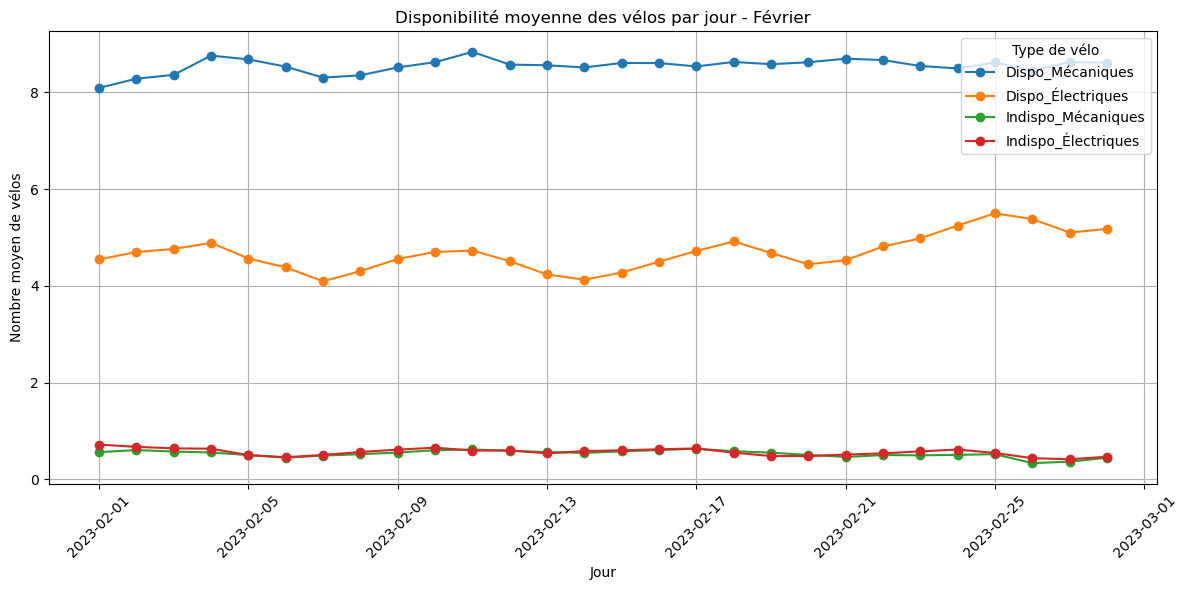

In [111]:
import matplotlib.pyplot as plt

# Tracer l’évolution des vélos disponibles et indisponibles
dispo_jour.plot(figsize=(12, 6), marker='o')

plt.title("Disponibilité moyenne des vélos par jour - Février")
plt.xlabel("Jour")
plt.ylabel("Nombre moyen de vélos")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Type de vélo")
plt.show()


In [60]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Dossier contenant les fichiers Excel de juin
dossier_juin = os.path.expanduser("~/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_06")

In [62]:
# Colonnes à garder
colonnes_interet = ['Date_Update', 'VM_Av', 'VAE_AV', 'VM_Unav', 'VAE_Unav']

# Liste pour stocker les résultats quotidiens
liste_moyennes = []


In [67]:
df_test = pd.read_excel("~/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_06/2023-06-01_Historique_remplissage_stations.xlsx")
print(df_test.columns.tolist())

['Code station', 'Nom station', 'longitude', 'latitude', 'Date mise à jour', 'VM disponibles', 'VAE disponibles', 'VM indisponibles', 'VAE indisponibles', 'Nombre de diapasons disponibles', 'VM disponibles (Station +)', 'VAE disponibles (Station +)', 'VM indisponibles (Station +)', 'VAE indisponibles (Station +)', 'Nombre de cables disponibles (Station +)']


In [75]:
import pandas as pd
import os
import glob

# Correction du chemin avec le tilde
dossier = "~/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_06/"
# Expansion du tilde pour obtenir le chemin absolu
dossier = os.path.expanduser(dossier)

print(f"Recherche de fichiers dans: {dossier}")

# Vérifier si le dossier existe
if not os.path.exists(dossier):
    print(f"ERREUR: Le dossier {dossier} n'existe pas!")
    print("Vérifiez le chemin du dossier.")
    import sys
    sys.exit("Script interrompu - dossier introuvable")

# Récupérer tous les fichiers Excel du dossier
pattern = os.path.join(dossier, "*_Historique_remplissage_stations.xlsx")
fichiers_excel = glob.glob(pattern)

print(f"Fichiers trouvés: {len(fichiers_excel)}")
if len(fichiers_excel) == 0:
    print("ERREUR: Aucun fichier Excel trouvé avec le motif spécifié")
    print(f"Motif de recherche utilisé: {pattern}")
    
    # Liste tous les fichiers dans le dossier pour déboguer
    try:
        tous_fichiers = os.listdir(dossier)
        print(f"\nContenu du dossier (premiers 10 fichiers):")
        for f in tous_fichiers[:10]:
            print(f"- {f}")
        if len(tous_fichiers) > 10:
            print(f"...et {len(tous_fichiers) - 10} autres fichiers")
    except Exception as e:
        print(f"Impossible de lister le contenu du dossier: {e}")
    
    # Sortir du script si aucun fichier n'est trouvé
    import sys
    sys.exit("Script interrompu - aucun fichier à traiter")

# Liste pour stocker les DataFrames
dfs = []

# Boucle sur chaque fichier
for i, fichier in enumerate(fichiers_excel):
    try:
        print(f"Traitement du fichier {i+1}/{len(fichiers_excel)}: {os.path.basename(fichier)}")
        # Charger le fichier Excel
        df = pd.read_excel(fichier)
        
        # Vérifier que le DataFrame n'est pas vide
        if df.empty:
            print(f" Attention: Le fichier {os.path.basename(fichier)} est vide")
            continue
            
        # Afficher la forme du DataFrame pour déboguer
        print(f"  - Dimensions du DataFrame: {df.shape[0]} lignes x {df.shape[1]} colonnes")
        
        # Extraire la date du nom de fichier
        nom_fichier = os.path.basename(fichier)
        date_str = nom_fichier.split('_')[0]  # Extrait "2023-06-XX"
        
        # Ajouter une colonne avec la date
        df['date'] = date_str
        
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    except Exception as e:
        print(f" Erreur lors du traitement du fichier {os.path.basename(fichier)}: {e}")

# Vérifier que nous avons des DataFrames à combiner
if len(dfs) == 0:
    print("ERREUR: Aucun DataFrame n'a été créé. Vérifiez le format des fichiers Excel.")
    import sys
    sys.exit("Script interrompu - aucun DataFrame à traiter")

# Combiner tous les DataFrames
print(f"\nConcaténation de {len(dfs)} DataFrames...")
df_complet = pd.concat(dfs, ignore_index=True)

print(f"Données combinées: {df_complet.shape[0]} entrées au total")

Recherche de fichiers dans: /Users/maysaramellak/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_06/
Fichiers trouvés: 30
Traitement du fichier 1/30: 2023-06-26_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 210269 lignes x 15 colonnes
Traitement du fichier 2/30: 2023-06-21_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 238625 lignes x 15 colonnes
Traitement du fichier 3/30: 2023-06-11_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 185289 lignes x 15 colonnes
Traitement du fichier 4/30: 2023-06-06_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 220235 lignes x 15 colonnes
Traitement du fichier 5/30: 2023-06-16_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 239097 lignes x 15 colonnes
Traitement du fichier 6/30: 2023-06-01_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 213901 lignes x 15 colonnes
Traitement du fichier 7/30: 2023-06-10_Historique_remplissage_sta

In [75]:
import pandas as pd
import os
import glob

# Correction du chemin avec le tilde
dossier = "~/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_06/"
# Expansion du tilde pour obtenir le chemin absolu
dossier = os.path.expanduser(dossier)

print(f"Recherche de fichiers dans: {dossier}")

# Vérifier si le dossier existe
if not os.path.exists(dossier):
    print(f"ERREUR: Le dossier {dossier} n'existe pas!")
    print("Vérifiez le chemin du dossier.")
    import sys
    sys.exit("Script interrompu - dossier introuvable")

# Récupérer tous les fichiers Excel du dossier
pattern = os.path.join(dossier, "*_Historique_remplissage_stations.xlsx")
fichiers_excel = glob.glob(pattern)

print(f"Fichiers trouvés: {len(fichiers_excel)}")
if len(fichiers_excel) == 0:
    print("ERREUR: Aucun fichier Excel trouvé avec le motif spécifié")
    print(f"Motif de recherche utilisé: {pattern}")
    
    # Liste tous les fichiers dans le dossier pour déboguer
    try:
        tous_fichiers = os.listdir(dossier)
        print(f"\nContenu du dossier (premiers 10 fichiers):")
        for f in tous_fichiers[:10]:
            print(f"- {f}")
        if len(tous_fichiers) > 10:
            print(f"...et {len(tous_fichiers) - 10} autres fichiers")
    except Exception as e:
        print(f"Impossible de lister le contenu du dossier: {e}")
    
    # Sortir du script si aucun fichier n'est trouvé
    import sys
    sys.exit("Script interrompu - aucun fichier à traiter")

# Liste pour stocker les DataFrames
dfs = []

# Boucle sur chaque fichier
for i, fichier in enumerate(fichiers_excel):
    try:
        print(f"Traitement du fichier {i+1}/{len(fichiers_excel)}: {os.path.basename(fichier)}")
        # Charger le fichier Excel
        df = pd.read_excel(fichier)
        
        # Vérifier que le DataFrame n'est pas vide
        if df.empty:
            print(f" Attention: Le fichier {os.path.basename(fichier)} est vide")
            continue
            
        # Afficher la forme du DataFrame pour déboguer
        print(f"  - Dimensions du DataFrame: {df.shape[0]} lignes x {df.shape[1]} colonnes")
        
        # Extraire la date du nom de fichier
        nom_fichier = os.path.basename(fichier)
        date_str = nom_fichier.split('_')[0]  # Extrait "2023-06-XX"
        
        # Ajouter une colonne avec la date
        df['date'] = date_str
        
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    except Exception as e:
        print(f" Erreur lors du traitement du fichier {os.path.basename(fichier)}: {e}")

# Vérifier que nous avons des DataFrames à combiner
if len(dfs) == 0:
    print("ERREUR: Aucun DataFrame n'a été créé. Vérifiez le format des fichiers Excel.")
    import sys
    sys.exit("Script interrompu - aucun DataFrame à traiter")

# Combiner tous les DataFrames
print(f"\nConcaténation de {len(dfs)} DataFrames...")
df_complet = pd.concat(dfs, ignore_index=True)

print(f"Données combinées: {df_complet.shape[0]} entrées au total")

Recherche de fichiers dans: /Users/maysaramellak/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_06/
Fichiers trouvés: 30
Traitement du fichier 1/30: 2023-06-26_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 210269 lignes x 15 colonnes
Traitement du fichier 2/30: 2023-06-21_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 238625 lignes x 15 colonnes
Traitement du fichier 3/30: 2023-06-11_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 185289 lignes x 15 colonnes
Traitement du fichier 4/30: 2023-06-06_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 220235 lignes x 15 colonnes
Traitement du fichier 5/30: 2023-06-16_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 239097 lignes x 15 colonnes
Traitement du fichier 6/30: 2023-06-01_Historique_remplissage_stations.xlsx
  - Dimensions du DataFrame: 213901 lignes x 15 colonnes
Traitement du fichier 7/30: 2023-06-10_Historique_remplissage_sta

In [77]:
df_complet.to_csv("velib_juin_2023_complet.csv", index=False)

In [79]:
print(df_complet.head())

   Code station                    Nom station  longitude   latitude  \
0          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   
1          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   
2          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   
3          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   
4          1001  Quai de l'Horloge - Pont Neuf   2.341798  48.857059   

     Date mise à jour  VM disponibles  VAE disponibles  VM indisponibles  \
0 2023-06-26 00:02:00               0                1                 0   
1 2023-06-26 00:29:00               0                2                 0   
2 2023-06-26 00:32:00               0                1                 0   
3 2023-06-26 02:45:00               0                2                 0   
4 2023-06-26 03:03:00               0                1                 0   

   VAE indisponibles  Nombre de diapasons disponibles  \
0                  0                               16

In [83]:
 dossier_juin = os.path.expanduser("~/Downloads/14-Hackathon/02_Historique_remplissage_stations/2023_06/velib_juin_2023_complet.csv")

In [85]:
df_remplissage_juin = pd.read_csv(dossier_juin,
    sep=",",
    encoding="utf-8-sig",
)

<Figure size 1400x600 with 0 Axes>

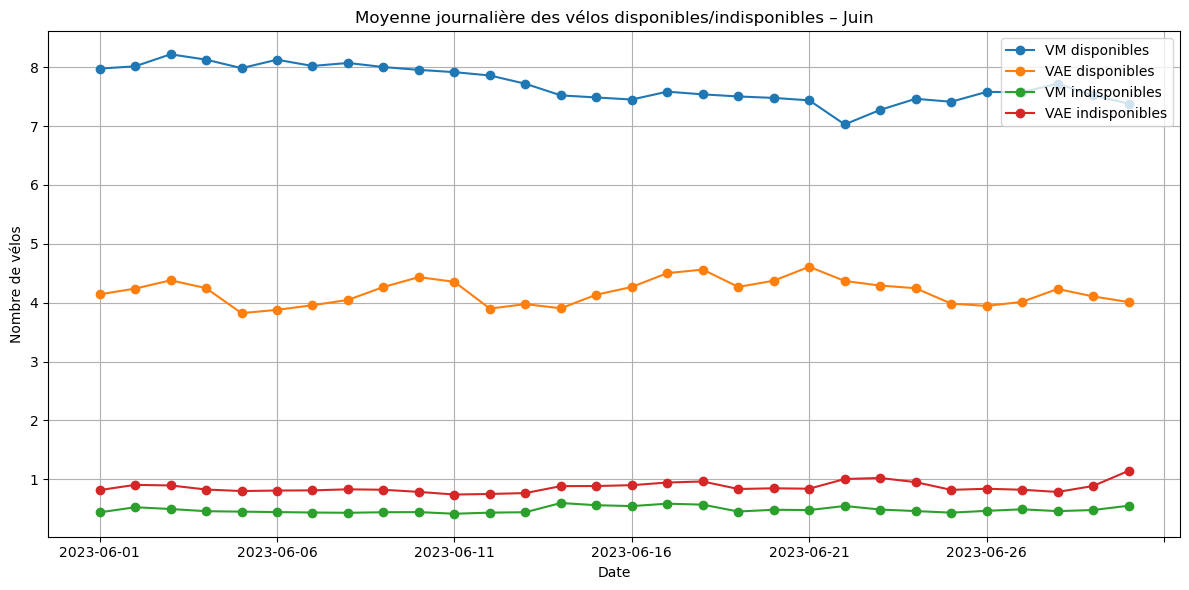

In [93]:
# Conversion des colonnes utiles en numériques
colonnes_numeriques_juin = [
    'VM disponibles', 'VAE disponibles',
    'VM indisponibles', 'VAE indisponibles'
]

for col in colonnes_numeriques_juin:
    df_remplissage_juin[col] = pd.to_numeric(df_remplissage_juin[col], errors='coerce')

# Supprimer les lignes sans date ou valeurs numériques manquantes
df_remplissage_juin = df_remplissage_juin.dropna(subset=['date'])

# Grouper par jour pour faire la moyenne journalière
moyennes_juin = df_remplissage_juin.groupby('date')[colonnes_numeriques_juin].mean()

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
moyennes_juin.plot(title="Moyenne journalière des vélos disponibles/indisponibles – Juin", figsize=(12,6), marker='o')
plt.xlabel("Date")
plt.ylabel("Nombre de vélos")
plt.grid(True)
plt.tight_layout()
plt.show()


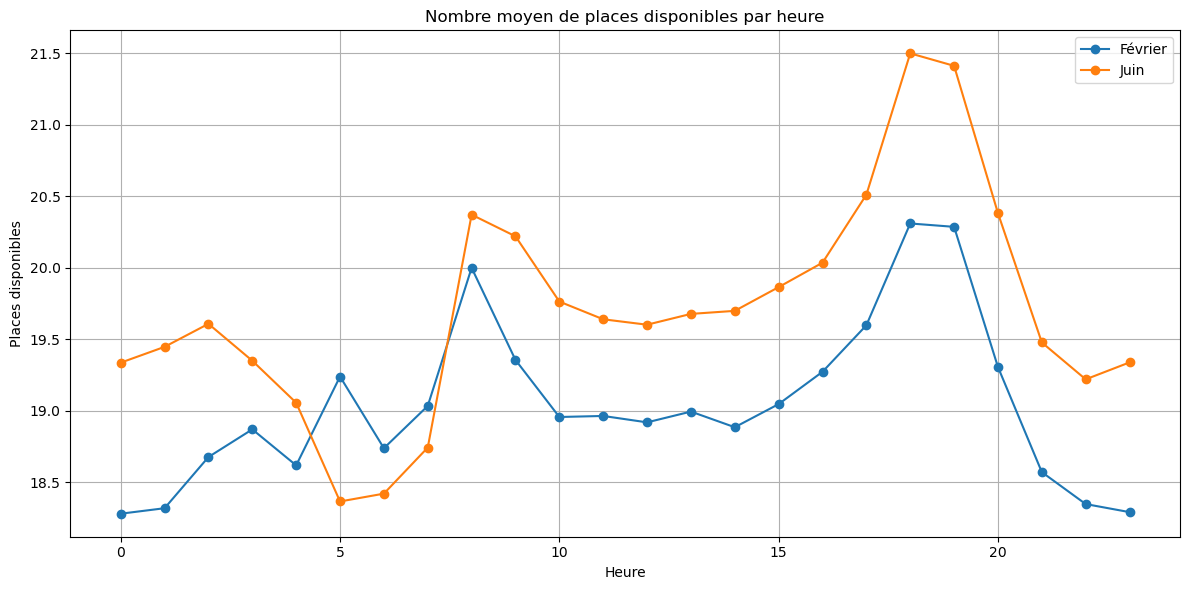

In [162]:
# Renommer les colonnes pour harmoniser
df_remplissage_fevrier = df_remplissage_fevrier.rename(columns={'Nb_Diap_av': 'places_disponibles'})
df_remplissage_juin = df_remplissage_juin.rename(columns={'Nombre de diapasons disponibles': 'places_disponibles'})

# Extraire l'heure à partir de la date
df_remplissage_fevrier['heure'] = df_remplissage_fevrier['Date_Update'].dt.hour
# Conversion de la date en datetime pour juin
df_remplissage_juin['Date mise à jour'] = pd.to_datetime(df_remplissage_juin['Date mise à jour'], errors='coerce')

# Extraction de l'heure
df_remplissage_juin['heure'] = df_remplissage_juin['Date mise à jour'].dt.hour


# Moyenne horaire des places disponibles
places_fevrier = df_remplissage_fevrier.groupby('heure')['places_disponibles'].mean()
places_juin = df_remplissage_juin.groupby('heure')['places_disponibles'].mean()

# Visualisation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(places_fevrier.index, places_fevrier.values, label='Février', marker='o')
plt.plot(places_juin.index, places_juin.values, label='Juin', marker='o')
plt.title("Nombre moyen de places disponibles par heure")
plt.xlabel("Heure")
plt.ylabel("Places disponibles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/v4/mq90pf9s04g995xgrt9dp8qh0000gn/T/ipykernel_71765/414262660.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


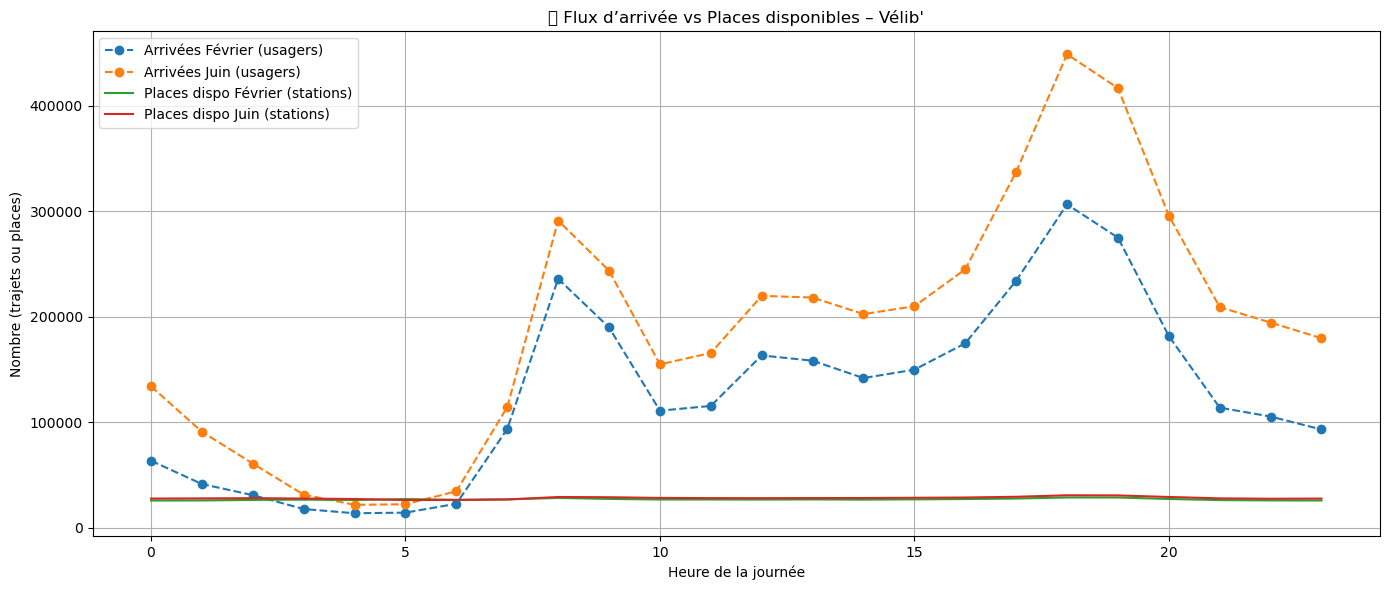

In [174]:
import matplotlib.pyplot as plt

# On suppose que 'heure_arrivee' est déjà calculée dans df_fevrier et df_juin
arrivees_fevrier = df_fevrier.groupby('heure_depart').size()
arrivees_juin = df_juin.groupby('heure_depart').size()

# Moyenne des places dispo par heure (historique stations)
places_fevrier = df_remplissage_fevrier.groupby('heure')['places_disponibles'].mean()
places_juin = df_remplissage_juin.groupby('heure')['places_disponibles'].mean()

# Ajustement à l'échelle : on multiplie les moyennes par le nombre de stations pour comparer aux flux
places_fevrier_total = places_fevrier * df_remplissage_fevrier['code_station'].nunique()
places_juin_total = places_juin * df_remplissage_juin['Code station'].nunique()

# Tracé du graphique comparatif
plt.figure(figsize=(14, 6))

plt.plot(arrivees_fevrier.index, arrivees_fevrier.values, '--o', label='Arrivées Février (usagers)')
plt.plot(arrivees_juin.index, arrivees_juin.values, '--o', label='Arrivées Juin (usagers)')

plt.plot(places_fevrier_total.index, places_fevrier_total.values, '-', label='Places dispo Février (stations)')
plt.plot(places_juin_total.index, places_juin_total.values, '-', label='Places dispo Juin (stations)')

plt.title(" Flux d’arrivée vs Places disponibles – Vélib'")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre (trajets ou places)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





/var/folders/v4/mq90pf9s04g995xgrt9dp8qh0000gn/T/ipykernel_71765/187084333.py:27: UserWarning: Glyph 128228 (\N{OUTBOX TRAY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128228 (\N{OUTBOX TRAY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


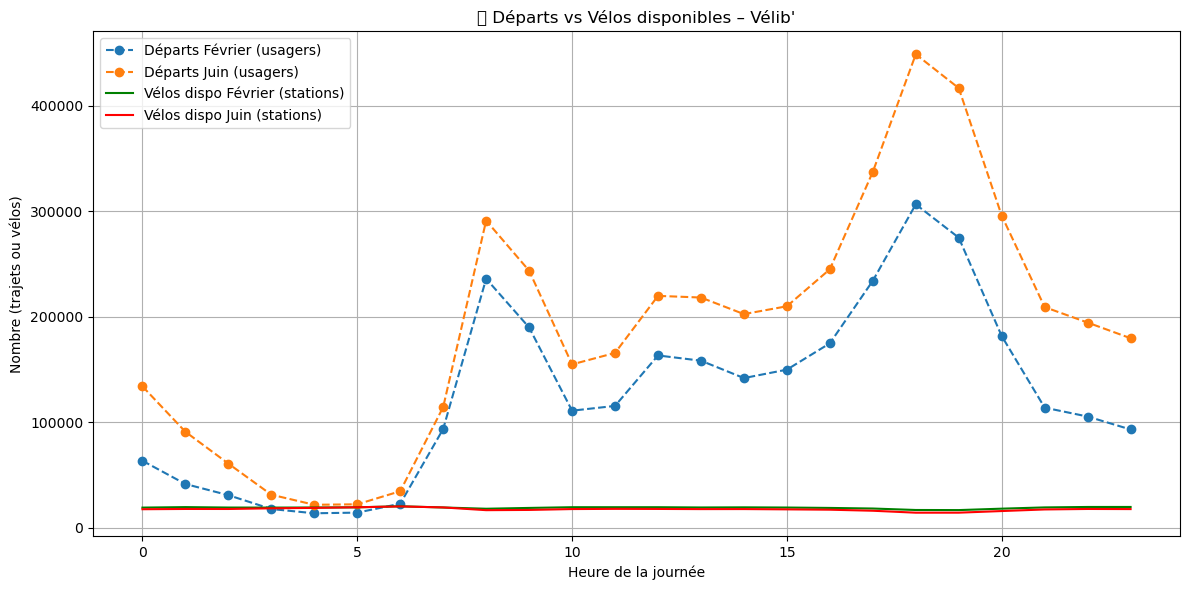

In [176]:
import matplotlib.pyplot as plt

# Départs par heure (usagers)
departs_fevrier = df_fevrier.groupby('heure_depart').size()
departs_juin = df_juin.groupby('heure_depart').size()

# Disponibilité des vélos par heure (historique stations)
df_remplissage_fevrier['heure'] = pd.to_datetime(df_remplissage_fevrier['Date_Update'], errors='coerce').dt.hour
df_remplissage_juin['heure'] = pd.to_datetime(df_remplissage_juin['Date mise à jour'], errors='coerce').dt.hour

# Moyenne des vélos disponibles par heure
dispo_fevrier = df_remplissage_fevrier.groupby('heure')[['VM_Av', 'VAE_AV']].mean().sum(axis=1)
dispo_juin = df_remplissage_juin.groupby('heure')[['VM disponibles', 'VAE disponibles']].mean().sum(axis=1)

#  Affichage
plt.figure(figsize=(12, 6))
plt.plot(departs_fevrier.index, departs_fevrier.values, label="Départs Février (usagers)", linestyle='--', marker='o')
plt.plot(departs_juin.index, departs_juin.values, label="Départs Juin (usagers)", linestyle='--', marker='o')
plt.plot(dispo_fevrier.index, dispo_fevrier.values * len(df_remplissage_fevrier['code_station'].unique()), label="Vélos dispo Février (stations)", color='green')
plt.plot(dispo_juin.index, dispo_juin.values * len(df_remplissage_juin['Code station'].unique()), label="Vélos dispo Juin (stations)", color='red')

plt.title(" Départs vs Vélos disponibles – Vélib'")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre (trajets ou vélos)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [196]:
import pandas as pd
import unidecode

#  1. Nettoyage des noms dans df_fevrier (flux usagers)
def normaliser_nom(station):
    if pd.isna(station):
        return None
    return unidecode.unidecode(str(station).strip().lower())

df_fevrier['from_station'] = df_fevrier['from_stat'].apply(normaliser_nom)
df_fevrier['to_station'] = df_fevrier['to_stat'].apply(normaliser_nom)

# Moyenne des arrivées / départs par station (normalisée)
arrivees_fevrier = df_fevrier.groupby('to_station').size()
departs_fevrier = df_fevrier.groupby('from_station').size()

#  2. Nettoyage des noms dans df_remplissage_fevrier
df_remplissage_fevrier['station_clean'] = df_remplissage_fevrier['station_name'].apply(normaliser_nom)

# Calcul des moyennes par station (remplissage)
remplissage_fevrier = df_remplissage_fevrier.groupby('station_clean').agg({
    'VM_Av': 'mean',
    'VAE_AV': 'mean',
    'places_disponibles': 'mean'
})
remplissage_fevrier['velos_disponibles'] = remplissage_fevrier['VM_Av'] + remplissage_fevrier['VAE_AV']

#  3. Fusionner les deux sources via station_clean
df_flux_remplissage = pd.DataFrame({
    'arrivees_moy': arrivees_fevrier,
    'departs_moy': departs_fevrier
}).join(remplissage_fevrier[['velos_disponibles', 'places_disponibles']], how='inner')

# Calcul des ratios d'utilisation
df_flux_remplissage['ratio_arrivees_vs_places'] = df_flux_remplissage['arrivees_moy'] / df_flux_remplissage['places_disponibles']
df_flux_remplissage['ratio_departs_vs_velos'] = df_flux_remplissage['departs_moy'] / df_flux_remplissage['velos_disponibles']

# Détection des stations critiques
seuil_arrivees = 10
seuil_departs = 10

df_critique_fevrier = df_flux_remplissage[
    (df_flux_remplissage['ratio_arrivees_vs_places'] > seuil_arrivees) |
    (df_flux_remplissage['ratio_departs_vs_velos'] > seuil_departs)
].sort_values(by=['ratio_arrivees_vs_places', 'ratio_departs_vs_velos'], ascending=False)

# Résultat
df_critique_fevrier.head(15)




,arrivees_moy,departs_moy,velos_disponibles,places_disponibles,ratio_arrivees_vs_places,ratio_departs_vs_velos
quai des celestins - henri iv,3824.0,3851.0,9.035868,3.638934,1050.857096,426.190358
place de l'hotel de ville,4204.0,4263.0,8.753920,4.168103,1008.612350,486.981830
strasbourg - saint-denis,4445.0,4494.0,9.951470,4.897346,907.634494,451.591565
traversiere - ledru-rollin,7872.0,7839.0,23.819544,8.716633,903.101042,329.099503
saint-antoine sevigne,6999.0,6968.0,15.881663,7.954600,879.868205,438.744974
pont neuf - rivoli,6538.0,6639.0,16.498381,8.260679,791.460377,402.403116
centre georges pompidou,6631.0,6646.0,15.679806,8.705876,761.669451,423.857298
lacuee - lyon,3506.0,3486.0,10.258223,4.689576,747.615535,339.824943
chabrol - d'hauteville,3365.0,3353.0,5.084186,4.584681,733.965939,659.495909
turbigo - francaise,3482.0,3531.0,9.942349,4.755065,732.271789,355.147465


In [194]:
print(" Colonnes disponibles :")
print(df_fevrier.columns.tolist())

 Colonnes disponibles :
['id_velo', 'is_vae', 'id_user', 'date_depart', 'date_arrive', 'distance', 'duration', 'max_speed', 'from_stat', 'latitude_start', 'longitude_start', 'start_station_status', 'to_stat', 'latitude_end', 'longitude_end', 'end_station_status', 'durée_min', 'heure_depart', 'jour_semaine', 'jour', 'mois', 'type_velo']


## 3- Regulation mouvements stations : 

In [263]:

import pandas as pd
import os

# Correction du chemin avec le tilde
dossier = "~/Downloads/14-Hackathon/03_Régulation_mouvements_stations/2023_06/"
# Expansion du tilde pour obtenir le chemin absolu
dossier = os.path.expanduser(dossier)
print(f"Recherche de fichiers dans: {dossier}")

# Vérifier si le dossier existe
if not os.path.exists(dossier):
    print(f"ERREUR: Le dossier {dossier} n'existe pas!")
    print("Vérifiez le chemin du dossier.")
    import sys
    sys.exit("Script interrompu - dossier introuvable")

# Récupérer tous les fichiers Excel du dossier
fichiers_dans_dossier = os.listdir(dossier)
fichiers_excel = []

print("Fichiers trouvés dans le dossier:")
for fichier in fichiers_dans_dossier:
    # Afficher chaque fichier pour le débogage
    print(f"- {fichier}")
    
    # Vérifier si c'est un fichier Excel contenant "Mouvements_de_régulation"
    if fichier.endswith('.xlsx') and "Mouvements" in fichier:
        fichiers_excel.append(os.path.join(dossier, fichier))

print(f"\nFichiers Excel de mouvements sélectionnés: {len(fichiers_excel)}")
if len(fichiers_excel) == 0:
    print("ERREUR: Aucun fichier Excel de mouvements trouvé")
    import sys
    sys.exit("Script interrompu - aucun fichier à traiter")

# Liste pour stocker les DataFrames
dfs = []

# Boucle sur chaque fichier
for i, fichier in enumerate(fichiers_excel):
    try:
        print(f"Traitement du fichier {i+1}/{len(fichiers_excel)}: {os.path.basename(fichier)}")
        # Charger le fichier Excel
        df = pd.read_excel(fichier)
        
        # Vérifier que le DataFrame n'est pas vide
        if df.empty:
            print(f" Attention: Le fichier {os.path.basename(fichier)} est vide")
            continue
            
        # Afficher la forme du DataFrame pour déboguer
        print(f"  - Dimensions du DataFrame: {df.shape[0]} lignes x {df.shape[1]} colonnes")
        
        # Extraire la date du nom de fichier
        nom_fichier = os.path.basename(fichier)
        date_str = nom_fichier.split('_')[0]  # Extrait "2023-06-XX"
        
        # Ajouter une colonne avec la date
        df['date'] = date_str
        
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    except Exception as e:
        print(f" Erreur lors du traitement du fichier {os.path.basename(fichier)}: {e}")

# Vérifier que nous avons des DataFrames à combiner
if len(dfs) == 0:
    print("ERREUR: Aucun DataFrame n'a été créé. Vérifiez le format des fichiers Excel.")
    import sys
    sys.exit("Script interrompu - aucun DataFrame à traiter")

# Combiner tous les DataFrames
print(f"\nConcaténation de {len(dfs)} DataFrames...")
df_complet = pd.concat(dfs, ignore_index=True)
print(f"Données combinées: {df_complet.shape[0]} entrées au total")

# Sauvegarder en CSV
chemin_sortie = os.path.join(os.path.dirname(dossier), "mouvements_regulation_juin2023.csv")
df_complet.to_csv(chemin_sortie, index=False)
print(f"\nFichier CSV sauvegardé: {chemin_sortie}")

Recherche de fichiers dans: /Users/maysaramellak/Downloads/14-Hackathon/03_Régulation_mouvements_stations/2023_06/
Fichiers trouvés dans le dossier:
- 2023-06-28_Mouvements_de_régulation.xlsx
- 2023-06-24_Mouvements_de_régulation.xlsx
- 2023-06-22_Mouvements_de_régulation.xlsx
- 2023-06-19_Mouvements_de_régulation.xlsx
- 2023-06-13_Mouvements_de_régulation.xlsx
- 2023-06-15_Mouvements_de_régulation.xlsx
- 2023-06-06_Mouvements_de_régulation.xlsx
- 2023-06-29_Mouvements_de_régulation.xlsx
- 2023-06-23_Mouvements_de_régulation.xlsx
- 2023-06-30_Mouvements_de_régulation.xlsx
- 2023-06-25_Mouvements_de_régulation.xlsx
- 2023-06-18_Mouvements_de_régulation.xlsx
- 2023-06-07_Mouvements_de_régulation.xlsx
- 2023-06-14_Mouvements_de_régulation.xlsx
- 2023-06-12_Mouvements_de_régulation.xlsx
- 2023-06-01_Mouvements_de_régulation.xlsx
- 2023-06-26_Mouvements_de_régulation.xlsx
- 2023-06-20_Mouvements_de_régulation.xlsx
- 2023-06-11_Mouvements_de_régulation.xlsx
- 2023-06-02_Mo

In [265]:
import pandas as pd
import os

# Correction du chemin avec le tilde
dossier = "~/Downloads/14-Hackathon/03_Régulation_mouvements_stations/2023_02/"
# Expansion du tilde pour obtenir le chemin absolu
dossier = os.path.expanduser(dossier)
print(f"Recherche de fichiers dans: {dossier}")

# Vérifier si le dossier existe
if not os.path.exists(dossier):
    print(f"ERREUR: Le dossier {dossier} n'existe pas!")
    print("Vérifiez le chemin du dossier.")
    import sys
    sys.exit("Script interrompu - dossier introuvable")

# Récupérer tous les fichiers Excel du dossier
fichiers_dans_dossier = os.listdir(dossier)
fichiers_excel = []

print("Fichiers trouvés dans le dossier:")
for fichier in fichiers_dans_dossier:
    # Afficher chaque fichier pour le débogage
    print(f"- {fichier}")
    
    # Vérifier si c'est un fichier Excel contenant "Mouvements_de_régulation"
    if fichier.endswith('.xlsx') and "Mouvements" in fichier:
        fichiers_excel.append(os.path.join(dossier, fichier))

print(f"\nFichiers Excel de mouvements sélectionnés: {len(fichiers_excel)}")
if len(fichiers_excel) == 0:
    print("ERREUR: Aucun fichier Excel de mouvements trouvé")
    import sys
    sys.exit("Script interrompu - aucun fichier à traiter")

# Liste pour stocker les DataFrames
dfs = []

# Boucle sur chaque fichier
for i, fichier in enumerate(fichiers_excel):
    try:
        print(f"Traitement du fichier {i+1}/{len(fichiers_excel)}: {os.path.basename(fichier)}")
        # Charger le fichier Excel
        df = pd.read_excel(fichier)
        
        # Vérifier que le DataFrame n'est pas vide
        if df.empty:
            print(f" Attention: Le fichier {os.path.basename(fichier)} est vide")
            continue
            
        # Afficher la forme du DataFrame pour déboguer
        print(f"  - Dimensions du DataFrame: {df.shape[0]} lignes x {df.shape[1]} colonnes")
        
        # Extraire la date du nom de fichier
        nom_fichier = os.path.basename(fichier)
        date_str = nom_fichier.split('_')[0]  # Extrait "2023-02-XX"
        
        # Ajouter une colonne avec la date
        df['date'] = date_str
        
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    except Exception as e:
        print(f" Erreur lors du traitement du fichier {os.path.basename(fichier)}: {e}")

# Vérifier que nous avons des DataFrames à combiner
if len(dfs) == 0:
    print("ERREUR: Aucun DataFrame n'a été créé. Vérifiez le format des fichiers Excel.")
    import sys
    sys.exit("Script interrompu - aucun DataFrame à traiter")

# Combiner tous les DataFrames
print(f"\nConcaténation de {len(dfs)} DataFrames...")
df_complet = pd.concat(dfs, ignore_index=True)
print(f"Données combinées: {df_complet.shape[0]} entrées au total")

# Sauvegarder en CSV
chemin_sortie = os.path.join(os.path.dirname(dossier), "mouvements_regulation_fevrier2023.csv")
df_complet.to_csv(chemin_sortie, index=False)
print(f"\nFichier CSV sauvegardé: {chemin_sortie}")

Recherche de fichiers dans: /Users/maysaramellak/Downloads/14-Hackathon/03_Régulation_mouvements_stations/2023_02/
Fichiers trouvés dans le dossier:
- 2023-02-27_Mouvements_de_régulation.xlsx
- 2023-02-21_Mouvements_de_régulation.xlsx
- 2023-02-10_Mouvements_de_régulation.xlsx
- 2023-02-03_Mouvements_de_régulation.xlsx
- 2023-02-05_Mouvements_de_régulation.xlsx
- 2023-02-16_Mouvements_de_régulation.xlsx
- 2023-02-09_Mouvements_de_régulation.xlsx
- 2023-02-20_Mouvements_de_régulation.xlsx
- 2023-02-26_Mouvements_de_régulation.xlsx
- 2023-02-17_Mouvements_de_régulation.xlsx
- 2023-02-04_Mouvements_de_régulation.xlsx
- 2023-02-02_Mouvements_de_régulation.xlsx
- 2023-02-11_Mouvements_de_régulation.xlsx
- 2023-02-08_Mouvements_de_régulation.xlsx
- 2023-02-25_Mouvements_de_régulation.xlsx
- 2023-02-23_Mouvements_de_régulation.xlsx
- 2023-02-18_Mouvements_de_régulation.xlsx
- 2023-02-01_Mouvements_de_régulation.xlsx
- 2023-02-12_Mouvements_de_régulation.xlsx
- 2023-02-14_Mo

In [269]:
import pandas as pd

# Chargement des fichiers CSV
df_reg_fevrier = pd.read_csv("~/Downloads/14-Hackathon/03_Régulation_mouvements_stations/2023_02/mouvements_regulation_fevrier2023.csv")
df_reg_juin = pd.read_csv("~/Downloads/14-Hackathon/03_Régulation_mouvements_stations/2023_06/mouvements_regulation_juin2023.csv")


In [271]:
# Normaliser les noms de colonnes
df_reg_fevrier.columns = df_reg_fevrier.columns.str.strip().str.lower().str.replace(" ", "_")
df_reg_juin.columns = df_reg_juin.columns.str.strip().str.lower().str.replace(" ", "_")

# Afficher les colonnes
print("Colonnes février :", df_reg_fevrier.columns.tolist())
print("Colonnes juin    :", df_reg_juin.columns.tolist())


Colonnes février : ['nom_station_prise', 'latitude_station_prise', 'longitude_station_prise', 'nom_station_dépose', 'latitude_station_dépose', 'longitude_station_dépose', 'total', 'vae', 'vm', 'date']
Colonnes juin    : ['nom_station_prise', 'latitude_station_prise', 'longitude_station_prise', 'nom_station_dépose', 'latitude_station_dépose', 'longitude_station_dépose', 'total', 'vae', 'vm', 'date']


In [281]:
# Total tous types confondus
total_fevrier = df_reg_fevrier['total'].sum()
total_juin = df_reg_juin['total'].sum()

print(f"Total vélos déplacés en février : {total_fevrier}")
print(f"Total vélos déplacés en juin    : {total_juin}")



Total vélos déplacés en février : 9352
Total vélos déplacés en juin    : 10456


In [283]:
print("Février - Détail :")
print(df_reg_fevrier[['vae', 'vm']].sum())

print("\nJuin - Détail :")
print(df_reg_juin[['vae', 'vm']].sum())


Février - Détail :
vae    1841
vm     7511
dtype: int64

Juin - Détail :
vae    2485
vm     7971
dtype: int64


In [287]:
# les 10 trajets les plus régulés les plus fréquents
importants_trajets_fevrier = df_reg_fevrier.groupby(['nom_station_prise', 'nom_station_dépose'])['total'].sum().sort_values(ascending=False).head(10)
importants_trajets_juin = df_reg_juin.groupby(['nom_station_prise', 'nom_station_dépose'])['total'].sum().sort_values(ascending=False).head(10)

print("stations avec plus de régulations Février :")
print(importants_trajets_fevrier)

print("\n stations avec plus régulations Juin :")
print(importants_trajets_juin)


stations avec plus de régulations Février :
nom_station_prise                       nom_station_dépose                      
Laffitte - Italiens                     Caulaincourt - Place Constantin Pecqueur    45
BNF - Bibliothèque Nationale de France  Porte d'Ivry                                36
Westermeyer - Paul Vaillant-Couturier   Porte de Charenton                          36
Terroirs de France - Lheureux           Place d'Italie - Soeur Rosalie              31
Jussieu - Guy de la Brosse              Epée de Bois - Mouffetard                   30
Bercy - Villot                          Place d'Italie - Soeur Rosalie              29
Rond-Point Rhin et Danube               Mozart - Jasmin                             28
Bercy.                                  Pyrénées - Charles Renouvier                28
Malesherbes - Place de la Madeleine     Gérando - Rochechouart                      27
Primo Levi - Frigos                     Place d'Italie - Vincent Auriol             26
Name:

In [295]:
# Récupération des stations régulées le plus souvent
stations_prise_fevrier = df_reg_fevrier['nom_station_prise'].value_counts().head(10)
stations_depose_fevrier = df_reg_fevrier['nom_station_dépose'].value_counts().head(10)

print("Stations souvent VIDÉES en février (prise) :")
print(stations_prise_fevrier)

print("\nStations souvent REMPLIES en février (dépose) :")
print(stations_depose_fevrier)

# Comparaison avec df_critique_fevrier
stations_critiques = df_critique_fevrier.index.tolist()
stations_prise_match = stations_prise_fevrier.index.intersection(stations_critiques)
stations_depose_match = stations_depose_fevrier.index.intersection(stations_critiques)

print(f"\nStations VIDÉES qui sont critiques : {list(stations_prise_match)}")
print(f"Stations REMPLIES qui sont critiques : {list(stations_depose_match)}")


Stations souvent VIDÉES en février (prise) :
nom_station_prise
Westermeyer - Paul Vaillant-Couturier     22
Malesherbes - Place de la Madeleine       21
Bercy - Villot                            20
BNF - Bibliothèque Nationale de France    18
Bercy.                                    14
M.- A. Lagroua Weill-Hallé -  F. Dolto    14
Grenelle - Dr Finlay                      14
Gare RER - Maurice Grandcoing             13
Parc André Citroën                        12
Terroirs de France - Lheureux             12
Name: count, dtype: int64

Stations souvent REMPLIES en février (dépose) :
nom_station_dépose
Place d'Italie - Soeur Rosalie         34
Gare Montparnasse - René Mouchotte     25
Place d'Italie - Vincent Auriol        24
Porte d'Ivry                           20
Pyrénées - Charles Renouvier           17
Maine - Jean Zay                       17
Odessa - Départ                        15
René Coty - Place Denfert-Rochereau    14
Bobillot - Paulin Mery                 14
Edgar Quinet - 

In [324]:
import pandas as pd
import unidecode

#  1. Nettoyage des noms dans df_fevrier (flux usagers)
def normaliser_nom(station):
    if pd.isna(station):
        return None
    return unidecode.unidecode(str(station).strip().lower())

df_juin['from_station'] = df_juin['from_stat'].apply(normaliser_nom)
df_juin['to_station'] = df_juin['to_stat'].apply(normaliser_nom)

# Moyenne des arrivées / départs par station (normalisée)
arrivees_juin = df_juin.groupby('to_station').size()
departs_juin = df_juin.groupby('from_station').size()

#  2. Nettoyage des noms dans df_remplissage_fevrier
df_remplissage_juin['station_clean'] = df_remplissage_juin['Nom station'].apply(normaliser_nom)

# Calcul des moyennes par station (remplissage)
remplissage_juin = df_remplissage_juin.groupby('station_clean').agg({
    'VM disponibles': 'mean',
    'VAE disponibles': 'mean',
    'places_disponibles': 'mean'
})
remplissage_juin['velos_disponibles'] = remplissage_juin['VM disponibles'] + remplissage_juin['VAE disponibles']

#  3. Fusionner les deux sources via station_clean
df_flux_remplissage = pd.DataFrame({
    'arrivees_moy': arrivees_juin,
    'departs_moy': departs_juin
}).join(remplissage_juin[['velos_disponibles', 'places_disponibles']], how='inner')

# Calcul des ratios d'utilisation
df_flux_remplissage['ratio_arrivees_vs_places'] = df_flux_remplissage['arrivees_moy'] / df_flux_remplissage['places_disponibles']
df_flux_remplissage['ratio_departs_vs_velos'] = df_flux_remplissage['departs_moy'] / df_flux_remplissage['velos_disponibles']

# Détection des stations critiques
seuil_arrivees = 10
seuil_departs = 10

df_critique_juin = df_flux_remplissage[
    (df_flux_remplissage['ratio_arrivees_vs_places'] > seuil_arrivees) |
    (df_flux_remplissage['ratio_departs_vs_velos'] > seuil_departs)
].sort_values(by=['ratio_arrivees_vs_places', 'ratio_departs_vs_velos'], ascending=False)

# Résultat
df_critique_juin.head(15)



,arrivees_moy,departs_moy,velos_disponibles,places_disponibles,ratio_arrivees_vs_places,ratio_departs_vs_velos
quai des celestins - henri iv,7011.0,7015.0,7.011902,5.162782,1357.988762,1000.441847
saint-antoine sevigne,11703.0,11667.0,13.291420,9.632715,1214.922215,877.784326
westermeyer - paul vaillant-couturier,4825.0,4672.0,17.962800,4.205705,1147.251162,260.093087
place de l'hotel de ville,6045.0,6037.0,7.338764,5.329224,1134.311584,822.618072
place de la republique - temple,9540.0,9656.0,7.482542,8.656009,1102.124556,1290.470604
quai de la loire - jean jaures,9051.0,9051.0,5.218318,8.514282,1063.037317,1734.466982
pont neuf - rivoli,10945.0,10970.0,14.319860,11.065177,989.139179,766.068953
chabrol - d'hauteville,4652.0,4662.0,4.942670,4.765730,976.135911,943.214888
traversiere - ledru-rollin,11323.0,11452.0,19.207249,11.658282,971.240847,596.233211
lacuee - lyon,5277.0,5224.0,8.744824,5.794984,910.615118,597.381978


In [328]:
# Nettoyage des noms pour les comparer plus facilement
def normaliser_nom(station):
    import unidecode
    if pd.isna(station):
        return None
    return unidecode.unidecode(str(station).strip().lower())

# Nettoyer les noms dans df_critique_juin
df_critique_juin = df_critique_juin.copy()
df_critique_juin['station_clean'] = df_critique_juin.index.to_series().apply(normaliser_nom)

# Nettoyer les noms dans df_mouvements_juin
df_reg_juin = df_reg_juin.copy()
df_reg_juin['station_prise_clean'] = df_reg_juin['nom_station_prise'].apply(normaliser_nom)
df_reg_juin['station_depose_clean'] = df_reg_juin['nom_station_dépose'].apply(normaliser_nom)

# Compter combien de fois une station critique est impliquée dans une régulation
regulation_par_station = df_reg_juin.groupby(['station_prise_clean', 'station_depose_clean'])[['total', 'vae', 'vm']].sum().reset_index()

# Séparer les dépôts et les prises pour les stations critiques
stations_critiques = df_critique_juin['station_clean'].unique()

# Prises (station vidée)
prise_critique = regulation_par_station[regulation_par_station['station_prise_clean'].isin(stations_critiques)]
# Dépôts (station remplie)
depose_critique = regulation_par_station[regulation_par_station['station_depose_clean'].isin(stations_critiques)]

# Résumé
print("Stations critiques VIDÉES (régulation prise) :")
print(prise_critique.sort_values(by='total', ascending=False).head(10))

print("\nStations critiques REMPLIES (régulation dépôt) :")
print(depose_critique.sort_values(by='total', ascending=False).head(10))


Stations critiques VIDÉES (régulation prise) :
                        station_prise_clean  \
478                       madeleine vionnet   
377                 hippodrome de longchamp   
381                 hippodrome de longchamp   
927   westermeyer - paul vaillant-couturier   
928   westermeyer - paul vaillant-couturier   
770         quai jules guesde - saint-simon   
512     malesherbes - place de la madeleine   
762                           porte molitor   
47   bnf - bibliotheque nationale de france   
36               berthier - porte de clichy   

                     station_depose_clean  total  vae  vm  
478           cambrai - benjamin constant     55   28  27  
377            place de la porte de passy     55   25  30  
381  route de sevres - porte de bagatelle     49   29  20  
927        place d'italie - soeur rosalie     38   12  26  
928       place d'italie - vincent auriol     36   14  22  
770       place d'italie - vincent auriol     34    2  32  
512            

In [330]:
# Nettoyage des noms pour les comparer plus facilement
def normaliser_nom(station):
    import unidecode
    if pd.isna(station):
        return None
    return unidecode.unidecode(str(station).strip().lower())

# Nettoyer les noms dans df_critique_fevrier
df_critique_fevrier = df_critique_fevrier.copy()
df_critique_fevrier['station_clean'] = df_critique_fevrier.index.to_series().apply(normaliser_nom)

# Nettoyer les noms dans df_mouvements_fevrier
df_reg_fevrier = df_reg_fevrier.copy()
df_reg_fevrier['station_prise_clean'] = df_reg_fevrier['nom_station_prise'].apply(normaliser_nom)
df_reg_fevrier['station_depose_clean'] = df_reg_fevrier['nom_station_dépose'].apply(normaliser_nom)

# Compter combien de fois une station critique est impliquée dans une régulation
regulation_par_station = df_reg_fevrier.groupby(['station_prise_clean', 'station_depose_clean'])[['total', 'vae', 'vm']].sum().reset_index()

# Séparer les dépôts et les prises pour les stations critiques
stations_critiques = df_critique_fevrier['station_clean'].unique()

# Prises (station vidée)
prise_critique = regulation_par_station[regulation_par_station['station_prise_clean'].isin(stations_critiques)]
# Dépôts (station remplie)
depose_critique = regulation_par_station[regulation_par_station['station_depose_clean'].isin(stations_critiques)]

# Résumé
print("Stations critiques VIDÉES (régulation prise) :")
print(prise_critique.sort_values(by='total', ascending=False).head(10))

print("\nStations critiques REMPLIES (régulation dépôt) :")
print(depose_critique.sort_values(by='total', ascending=False).head(10))

Stations critiques VIDÉES (régulation prise) :
                        station_prise_clean  \
475                     laffitte - italiens   
924   westermeyer - paul vaillant-couturier   
84   bnf - bibliotheque nationale de france   
873           terroirs de france - lheureux   
468              jussieu - guy de la brosse   
53                           bercy - villot   
69                                   bercy.   
794               rond-point rhin et danube   
550     malesherbes - place de la madeleine   
55                           bercy - villot   

                         station_depose_clean  total  vae  vm  
475  caulaincourt - place constantin pecqueur     45    8  37  
924                        porte de charenton     36    7  29  
84                               porte d'ivry     36    5  31  
873            place d'italie - soeur rosalie     31    9  22  
468                 epee de bois - mouffetard     30    7  23  
53             place d'italie - soeur rosalie     2

## 4- regulations mouvements ateliers 

In [332]:
import pandas as pd
import os

# Correction du chemin avec le tilde
dossier = "~/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/stations-vers-ateliers/2023_02/"
# Expansion du tilde pour obtenir le chemin absolu
dossier = os.path.expanduser(dossier)
print(f"Recherche de fichiers dans: {dossier}")

# Vérifier si le dossier existe
if not os.path.exists(dossier):
    print(f"ERREUR: Le dossier {dossier} n'existe pas!")
    print("Vérifiez le chemin du dossier.")
    import sys
    sys.exit("Script interrompu - dossier introuvable")

# Récupérer tous les fichiers Excel du dossier
fichiers_dans_dossier = os.listdir(dossier)
fichiers_excel = []

print("Fichiers trouvés dans le dossier:")
for fichier in fichiers_dans_dossier:
    # Afficher chaque fichier pour le débogage
    print(f"- {fichier}")
    
    # Vérifier si c'est un fichier Excel contenant "Mouvements_de_régulation"
    if fichier.endswith('.xlsx') and "stations" in fichier:
        fichiers_excel.append(os.path.join(dossier, fichier))

print(f"\nFichiers Excel de mouvements sélectionnés: {len(fichiers_excel)}")
if len(fichiers_excel) == 0:
    print("ERREUR: Aucun fichier Excel de mouvements trouvé")
    import sys
    sys.exit("Script interrompu - aucun fichier à traiter")

# Liste pour stocker les DataFrames
dfs = []

# Boucle sur chaque fichier
for i, fichier in enumerate(fichiers_excel):
    try:
        print(f"Traitement du fichier {i+1}/{len(fichiers_excel)}: {os.path.basename(fichier)}")
        # Charger le fichier Excel
        df = pd.read_excel(fichier)
        
        # Vérifier que le DataFrame n'est pas vide
        if df.empty:
            print(f" Attention: Le fichier {os.path.basename(fichier)} est vide")
            continue
            
        # Afficher la forme du DataFrame pour déboguer
        print(f"  - Dimensions du DataFrame: {df.shape[0]} lignes x {df.shape[1]} colonnes")
        
        # Extraire la date du nom de fichier
        nom_fichier = os.path.basename(fichier)
        date_str = nom_fichier.split('_')[0]  # Extrait "2023-02-XX"
        
        # Ajouter une colonne avec la date
        df['date'] = date_str
        
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    except Exception as e:
        print(f" Erreur lors du traitement du fichier {os.path.basename(fichier)}: {e}")

# Vérifier que nous avons des DataFrames à combiner
if len(dfs) == 0:
    print("ERREUR: Aucun DataFrame n'a été créé. Vérifiez le format des fichiers Excel.")
    import sys
    sys.exit("Script interrompu - aucun DataFrame à traiter")

# Combiner tous les DataFrames
print(f"\nConcaténation de {len(dfs)} DataFrames...")
df_complet = pd.concat(dfs, ignore_index=True)
print(f"Données combinées: {df_complet.shape[0]} entrées au total")

# Sauvegarder en CSV
chemin_sortie = os.path.join(os.path.dirname(dossier), "stations_ateliers_fevrier2023.csv")
df_complet.to_csv(chemin_sortie, index=False)
print(f"\nFichier CSV sauvegardé: {chemin_sortie}")

Recherche de fichiers dans: /Users/maysaramellak/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/stations-vers-ateliers/2023_02/
Fichiers trouvés dans le dossier:
- 2023-02-04_stations-ateliers.xlsx
- 2023-02-03_stations-ateliers.xlsx
- 2023-02-09_stations-ateliers.xlsx
- 2023-02-07_stations-ateliers.xlsx
- 2023-02-06_stations-ateliers.xlsx
- 2023-02-01_stations-ateliers.xlsx
- 2023-02-08_stations-ateliers.xlsx
- 2023-02-02_stations-ateliers.xlsx
- 2023-02-05_stations-ateliers.xlsx
- 2023-02-17_stations-ateliers.xlsx
- 2023-02-26_stations-ateliers.xlsx
- 2023-02-10_stations-ateliers.xlsx
- 2023-02-21_stations-ateliers.xlsx
- 2023-02-19_stations-ateliers.xlsx
- 2023-02-13_stations-ateliers.xlsx
- 2023-02-22_stations-ateliers.xlsx
- 2023-02-28_stations-ateliers.xlsx
- 2023-02-14_stations-ateliers.xlsx
- 2023-02-25_stations-ateliers.xlsx
- 2023-02-24_stations-ateliers.xlsx
- 2023-02-15_stations-ateliers.xlsx
- 2023-02-23_stations-ateliers.xlsx
- 2023-02-12_stations-ateliers.xlsx


In [334]:
import pandas as pd
import os

# Correction du chemin avec le tilde
dossier = "~/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/stations-vers-ateliers/2023_06/"
# Expansion du tilde pour obtenir le chemin absolu
dossier = os.path.expanduser(dossier)
print(f"Recherche de fichiers dans: {dossier}")

# Vérifier si le dossier existe
if not os.path.exists(dossier):
    print(f"ERREUR: Le dossier {dossier} n'existe pas!")
    print("Vérifiez le chemin du dossier.")
    import sys
    sys.exit("Script interrompu - dossier introuvable")

# Récupérer tous les fichiers Excel du dossier
fichiers_dans_dossier = os.listdir(dossier)
fichiers_excel = []

print("Fichiers trouvés dans le dossier:")
for fichier in fichiers_dans_dossier:
    # Afficher chaque fichier pour le débogage
    print(f"- {fichier}")
    
    # Vérifier si c'est un fichier Excel contenant "Mouvements_de_régulation"
    if fichier.endswith('.xlsx') and "stations" in fichier:
        fichiers_excel.append(os.path.join(dossier, fichier))

print(f"\nFichiers Excel de mouvements sélectionnés: {len(fichiers_excel)}")
if len(fichiers_excel) == 0:
    print("ERREUR: Aucun fichier Excel de mouvements trouvé")
    import sys
    sys.exit("Script interrompu - aucun fichier à traiter")

# Liste pour stocker les DataFrames
dfs = []

# Boucle sur chaque fichier
for i, fichier in enumerate(fichiers_excel):
    try:
        print(f"Traitement du fichier {i+1}/{len(fichiers_excel)}: {os.path.basename(fichier)}")
        # Charger le fichier Excel
        df = pd.read_excel(fichier)
        
        # Vérifier que le DataFrame n'est pas vide
        if df.empty:
            print(f" Attention: Le fichier {os.path.basename(fichier)} est vide")
            continue
            
        # Afficher la forme du DataFrame pour déboguer
        print(f"  - Dimensions du DataFrame: {df.shape[0]} lignes x {df.shape[1]} colonnes")
        
        # Extraire la date du nom de fichier
        nom_fichier = os.path.basename(fichier)
        date_str = nom_fichier.split('_')[0]  # Extrait "2023-02-XX"
        
        # Ajouter une colonne avec la date
        df['date'] = date_str
        
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    except Exception as e:
        print(f" Erreur lors du traitement du fichier {os.path.basename(fichier)}: {e}")

# Vérifier que nous avons des DataFrames à combiner
if len(dfs) == 0:
    print("ERREUR: Aucun DataFrame n'a été créé. Vérifiez le format des fichiers Excel.")
    import sys
    sys.exit("Script interrompu - aucun DataFrame à traiter")

# Combiner tous les DataFrames
print(f"\nConcaténation de {len(dfs)} DataFrames...")
df_complet = pd.concat(dfs, ignore_index=True)
print(f"Données combinées: {df_complet.shape[0]} entrées au total")

# Sauvegarder en CSV
chemin_sortie = os.path.join(os.path.dirname(dossier), "stations_ateliers_juin2023.csv")
df_complet.to_csv(chemin_sortie, index=False)
print(f"\nFichier CSV sauvegardé: {chemin_sortie}")

Recherche de fichiers dans: /Users/maysaramellak/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/stations-vers-ateliers/2023_06/
Fichiers trouvés dans le dossier:
- 2023-06-17_stations-ateliers.xlsx
- 2023-06-26_stations-ateliers.xlsx
- 2023-06-10_stations-ateliers.xlsx
- 2023-06-21_stations-ateliers.xlsx
- 2023-06-13_stations-ateliers.xlsx
- .DS_Store
- 2023-06-19_stations-ateliers.xlsx
- 2023-06-28_stations-ateliers.xlsx
- 2023-06-22_stations-ateliers.xlsx
- 2023-06-14_stations-ateliers.xlsx
- 2023-06-25_stations-ateliers.xlsx
- 2023-06-24_stations-ateliers.xlsx
- 2023-06-15_stations-ateliers.xlsx
- 2023-06-23_stations-ateliers.xlsx
- 2023-06-29_stations-ateliers.xlsx
- 2023-06-18_stations-ateliers.xlsx
- 2023-06-12_stations-ateliers.xlsx
- 2023-06-20_stations-ateliers.xlsx
- 2023-06-11_stations-ateliers.xlsx
- 2023-06-27_stations-ateliers.xlsx
- 2023-06-16_stations-ateliers.xlsx
- 2023-06-04_stations-ateliers.xlsx
- 2023-06-09_stations-ateliers.xlsx
- 2023-06-03_stations-at

In [336]:
import pandas as pd
import os

# Correction du chemin avec le tilde
dossier = "~/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/ateliers-vers-stations/2023_02/"
# Expansion du tilde pour obtenir le chemin absolu
dossier = os.path.expanduser(dossier)
print(f"Recherche de fichiers dans: {dossier}")

# Vérifier si le dossier existe
if not os.path.exists(dossier):
    print(f"ERREUR: Le dossier {dossier} n'existe pas!")
    print("Vérifiez le chemin du dossier.")
    import sys
    sys.exit("Script interrompu - dossier introuvable")

# Récupérer tous les fichiers Excel du dossier
fichiers_dans_dossier = os.listdir(dossier)
fichiers_excel = []

print("Fichiers trouvés dans le dossier:")
for fichier in fichiers_dans_dossier:
    # Afficher chaque fichier pour le débogage
    print(f"- {fichier}")
    
    # Vérifier si c'est un fichier Excel contenant "Mouvements_de_régulation"
    if fichier.endswith('.xlsx') and "ateliers" in fichier:
        fichiers_excel.append(os.path.join(dossier, fichier))

print(f"\nFichiers Excel de mouvements sélectionnés: {len(fichiers_excel)}")
if len(fichiers_excel) == 0:
    print("ERREUR: Aucun fichier Excel de mouvements trouvé")
    import sys
    sys.exit("Script interrompu - aucun fichier à traiter")

# Liste pour stocker les DataFrames
dfs = []

# Boucle sur chaque fichier
for i, fichier in enumerate(fichiers_excel):
    try:
        print(f"Traitement du fichier {i+1}/{len(fichiers_excel)}: {os.path.basename(fichier)}")
        # Charger le fichier Excel
        df = pd.read_excel(fichier)
        
        # Vérifier que le DataFrame n'est pas vide
        if df.empty:
            print(f" Attention: Le fichier {os.path.basename(fichier)} est vide")
            continue
            
        # Afficher la forme du DataFrame pour déboguer
        print(f"  - Dimensions du DataFrame: {df.shape[0]} lignes x {df.shape[1]} colonnes")
        
        # Extraire la date du nom de fichier
        nom_fichier = os.path.basename(fichier)
        date_str = nom_fichier.split('_')[0]  # Extrait "2023-02-XX"
        
        # Ajouter une colonne avec la date
        df['date'] = date_str
        
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    except Exception as e:
        print(f" Erreur lors du traitement du fichier {os.path.basename(fichier)}: {e}")

# Vérifier que nous avons des DataFrames à combiner
if len(dfs) == 0:
    print("ERREUR: Aucun DataFrame n'a été créé. Vérifiez le format des fichiers Excel.")
    import sys
    sys.exit("Script interrompu - aucun DataFrame à traiter")

# Combiner tous les DataFrames
print(f"\nConcaténation de {len(dfs)} DataFrames...")
df_complet = pd.concat(dfs, ignore_index=True)
print(f"Données combinées: {df_complet.shape[0]} entrées au total")

# Sauvegarder en CSV
chemin_sortie = os.path.join(os.path.dirname(dossier), "ateliers_stations_fevrier2023.csv")
df_complet.to_csv(chemin_sortie, index=False)
print(f"\nFichier CSV sauvegardé: {chemin_sortie}")

Recherche de fichiers dans: /Users/maysaramellak/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/ateliers-vers-stations/2023_02/
Fichiers trouvés dans le dossier:
- 2023-02-08_ateliers_stations.xlsx
- 2023-02-02_ateliers_stations.xlsx
- 2023-02-05_ateliers_stations.xlsx
- 2023-02-06_ateliers_stations.xlsx
- 2023-02-01_ateliers_stations.xlsx
- 2023-02-07_ateliers_stations.xlsx
- 2023-02-04_ateliers_stations.xlsx
- 2023-02-03_ateliers_stations.xlsx
- 2023-02-09_ateliers_stations.xlsx
- 2023-02-11_ateliers_stations.xlsx
- 2023-02-20_ateliers_stations.xlsx
- 2023-02-16_ateliers_stations.xlsx
- 2023-02-27_ateliers_stations.xlsx
- 2023-02-15_ateliers_stations.xlsx
- 2023-02-24_ateliers_stations.xlsx
- 2023-02-12_ateliers_stations.xlsx
- 2023-02-18_ateliers_stations.xlsx
- 2023-02-23_ateliers_stations.xlsx
- 2023-02-22_ateliers_stations.xlsx
- 2023-02-28_ateliers_stations.xlsx
- 2023-02-19_ateliers_stations.xlsx
- 2023-02-13_ateliers_stations.xlsx
- 2023-02-25_ateliers_stations.xlsx


In [338]:
import pandas as pd
import os

# Correction du chemin avec le tilde
dossier = "~/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/ateliers-vers-stations/2023_06/"
# Expansion du tilde pour obtenir le chemin absolu
dossier = os.path.expanduser(dossier)
print(f"Recherche de fichiers dans: {dossier}")

# Vérifier si le dossier existe
if not os.path.exists(dossier):
    print(f"ERREUR: Le dossier {dossier} n'existe pas!")
    print("Vérifiez le chemin du dossier.")
    import sys
    sys.exit("Script interrompu - dossier introuvable")

# Récupérer tous les fichiers Excel du dossier
fichiers_dans_dossier = os.listdir(dossier)
fichiers_excel = []

print("Fichiers trouvés dans le dossier:")
for fichier in fichiers_dans_dossier:
    # Afficher chaque fichier pour le débogage
    print(f"- {fichier}")
    
    # Vérifier si c'est un fichier Excel contenant "Mouvements_de_régulation"
    if fichier.endswith('.xlsx') and "ateliers" in fichier:
        fichiers_excel.append(os.path.join(dossier, fichier))

print(f"\nFichiers Excel de mouvements sélectionnés: {len(fichiers_excel)}")
if len(fichiers_excel) == 0:
    print("ERREUR: Aucun fichier Excel de mouvements trouvé")
    import sys
    sys.exit("Script interrompu - aucun fichier à traiter")

# Liste pour stocker les DataFrames
dfs = []

# Boucle sur chaque fichier
for i, fichier in enumerate(fichiers_excel):
    try:
        print(f"Traitement du fichier {i+1}/{len(fichiers_excel)}: {os.path.basename(fichier)}")
        # Charger le fichier Excel
        df = pd.read_excel(fichier)
        
        # Vérifier que le DataFrame n'est pas vide
        if df.empty:
            print(f" Attention: Le fichier {os.path.basename(fichier)} est vide")
            continue
            
        # Afficher la forme du DataFrame pour déboguer
        print(f"  - Dimensions du DataFrame: {df.shape[0]} lignes x {df.shape[1]} colonnes")
        
        # Extraire la date du nom de fichier
        nom_fichier = os.path.basename(fichier)
        date_str = nom_fichier.split('_')[0]  # Extrait "2023-02-XX"
        
        # Ajouter une colonne avec la date
        df['date'] = date_str
        
        # Ajouter le DataFrame à la liste
        dfs.append(df)
    except Exception as e:
        print(f" Erreur lors du traitement du fichier {os.path.basename(fichier)}: {e}")

# Vérifier que nous avons des DataFrames à combiner
if len(dfs) == 0:
    print("ERREUR: Aucun DataFrame n'a été créé. Vérifiez le format des fichiers Excel.")
    import sys
    sys.exit("Script interrompu - aucun DataFrame à traiter")

# Combiner tous les DataFrames
print(f"\nConcaténation de {len(dfs)} DataFrames...")
df_complet = pd.concat(dfs, ignore_index=True)
print(f"Données combinées: {df_complet.shape[0]} entrées au total")

# Sauvegarder en CSV
chemin_sortie = os.path.join(os.path.dirname(dossier), "ateliers_stations_juin2023.csv")
df_complet.to_csv(chemin_sortie, index=False)
print(f"\nFichier CSV sauvegardé: {chemin_sortie}")

Recherche de fichiers dans: /Users/maysaramellak/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/ateliers-vers-stations/2023_06/
Fichiers trouvés dans le dossier:
- 2023-06-29_ateliers-stations.xlsx
- 2023-06-23_ateliers-stations.xlsx
- 2023-06-12_ateliers-stations.xlsx
- 2023-06-18_ateliers-stations.xlsx
- 2023-06-24_ateliers-stations.xlsx
- 2023-06-15_ateliers-stations.xlsx
- 2023-06-27_ateliers-stations.xlsx
- 2023-06-16_ateliers-stations.xlsx
- 2023-06-20_ateliers-stations.xlsx
- 2023-06-11_ateliers-stations.xlsx
- 2023-06-10_ateliers-stations.xlsx
- 2023-06-21_ateliers-stations.xlsx
- 2023-06-17_ateliers-stations.xlsx
- 2023-06-26_ateliers-stations.xlsx
- 2023-06-14_ateliers-stations.xlsx
- 2023-06-25_ateliers-stations.xlsx
- 2023-06-19_ateliers-stations.xlsx
- 2023-06-13_ateliers-stations.xlsx
- 2023-06-22_ateliers-stations.xlsx
- 2023-06-28_ateliers-stations.xlsx
- 2023-06-01_ateliers-stations.xlsx
- 2023-06-30_ateliers-stations.xlsx
- 2023-06-06_ateliers-stations.xlsx


In [342]:
df_ateliers_stations_juin = pd.read_csv("~/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/ateliers-vers-stations/2023_06/ateliers_stations_juin2023.csv")
df_ateliers_stations_fevrier = pd.read_csv("~/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/ateliers-vers-stations/2023_02/ateliers_stations_fevrier2023.csv")
df_stations_ateliers_juin = pd.read_csv("~/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/stations-vers-ateliers/2023_06/stations_ateliers_juin2023.csv")
df_stations_ateliers_fevrier = pd.read_csv("~/Downloads/14-Hackathon/04_Régulation_mouvements_ateliers/stations-vers-ateliers/2023_02/stations_ateliers_fevrier2023.csv")

In [344]:
print(" Colonnes ateliers ➝ stations (juin) :", df_ateliers_stations_juin.columns.tolist())
print(" Colonnes ateliers ➝ stations (février) :", df_ateliers_stations_fevrier.columns.tolist())
print(" Colonnes stations ➝ ateliers (juin) :", df_stations_ateliers_juin.columns.tolist())
print(" Colonnes stations ➝ ateliers (février) :", df_stations_ateliers_fevrier.columns.tolist())


 Colonnes ateliers ➝ stations (juin) : ['Nom station dépose', 'Latitude station dépose', 'Longitude station dépose', 'Total', 'VAE', 'VM', 'date']
 Colonnes ateliers ➝ stations (février) : ['Nom station dépose', 'Latitude station dépose', 'Longitude station dépose', 'Total', 'VAE', 'VM', 'date']
 Colonnes stations ➝ ateliers (juin) : ['Nom station prise', 'Latitude station prise', 'Longitude station prise', 'Total', 'VAE', 'VM', 'date']
 Colonnes stations ➝ ateliers (février) : ['Nom station prise', 'Latitude station prise', 'Longitude station prise', 'Total', 'VAE', 'VM', 'date']


In [348]:
import pandas as pd
import unidecode

#  Fonction de nettoyage pour noms de station
def normaliser_nom(station):
    if pd.isna(station):
        return None
    return unidecode.unidecode(str(station).strip().lower())

#  Normaliser noms dans tous les DataFrames
df_ateliers_stations_juin['station_clean'] = df_ateliers_stations_juin['Nom station dépose'].apply(normaliser_nom)
df_stations_ateliers_juin['station_clean'] = df_stations_ateliers_juin['Nom station prise'].apply(normaliser_nom)
df_remplissage_juin['station_clean'] = df_remplissage_juin['Nom station'].apply(normaliser_nom)

#  1. Total injectés / collectés par station (sur le mois)
injections = df_ateliers_stations_juin.groupby('station_clean')['Total'].sum().rename("velos_injectes")
retraits = df_stations_ateliers_juin.groupby('station_clean')['Total'].sum().rename("velos_collectes")

#  2. Moyenne de vélos indisponibles par station (pannes potentielles)
indispo = df_remplissage_juin.groupby('station_clean')[['VM indisponibles', 'VAE indisponibles']].mean()
indispo['velos_indisponibles'] = indispo['VM indisponibles'] + indispo['VAE indisponibles']

#  3. Fusionner tous les éléments
df_atelier_impact = pd.concat([injections, retraits, indispo['velos_indisponibles']], axis=1).fillna(0)

#  4. Stations les plus concernées
df_atelier_impact['solde_net'] = df_atelier_impact['velos_injectes'] - df_atelier_impact['velos_collectes']
df_atelier_impact = df_atelier_impact.sort_values(by='velos_indisponibles', ascending=False)

#  5. Affichage
df_atelier_impact.head(15)



,velos_injectes,velos_collectes,velos_indisponibles,solde_net
station_clean,,,,
quai panhard et levassor,119.0,27.0,4.559952,92.0
porte de versailles,0.0,14.0,3.913880,-14.0
quai de la gare - pont de bercy,0.0,10.0,3.794628,-10.0
jardin modele - pierre boudou,0.0,7.0,3.626218,-7.0
place des marseillais,12.0,20.0,3.600431,-8.0
richard lenoir - place de la bastille,8.0,44.0,3.528251,-36.0
gare rer de vincennes,2.0,27.0,3.498802,-25.0
gare saint-lazare - cour du havre,15.0,25.0,3.479340,-10.0
maison de radio - france,0.0,23.0,3.256901,-23.0


In [350]:
import unidecode

# 1. Fonction pour nettoyer les noms
def normaliser_nom(station):
    if pd.isna(station):
        return None
    return unidecode.unidecode(str(station).strip().lower())

# 2. Nettoyage des noms
df_ateliers_stations_fevrier['station_clean'] = df_ateliers_stations_fevrier['Nom station dépose'].apply(normaliser_nom)
df_stations_ateliers_fevrier['station_clean'] = df_stations_ateliers_fevrier['Nom station prise'].apply(normaliser_nom)
df_remplissage_fevrier['station_clean'] = df_remplissage_fevrier['station_name'].apply(normaliser_nom)

# 3. Agrégation
injections_fev = df_ateliers_stations_fevrier.groupby('station_clean')['Total'].sum().rename("velos_injectes")
retraits_fev = df_stations_ateliers_fevrier.groupby('station_clean')['Total'].sum().rename("velos_collectes")

# 4. Indisponibilité (moyenne)
indispo_fev = df_remplissage_fevrier.groupby('station_clean')[['VM_Unav', 'VAE_Unav']].mean()
indispo_fev['velos_indisponibles'] = indispo_fev['VM_Unav'] + indispo_fev['VAE_Unav']

# 5. Fusion des données
df_atelier_impact_fev = pd.concat([injections_fev, retraits_fev, indispo_fev['velos_indisponibles']], axis=1).fillna(0)

# 6. Calcul du solde net
df_atelier_impact_fev['solde_net'] = df_atelier_impact_fev['velos_injectes'] - df_atelier_impact_fev['velos_collectes']

# 7. Résultat : top stations avec le plus d’indisponibilité
df_atelier_impact_fev.sort_values(by='velos_indisponibles', ascending=False).head(15)


,velos_injectes,velos_collectes,velos_indisponibles,solde_net
station_clean,,,,
perrault - place du louvre,0.0,7.0,5.337497,-7.0
place du 8 mai 1945,0.0,0.0,4.815625,0.0
charles tillon - cimetiere communal,0.0,12.0,4.586385,-12.0
hippodrome de longchamp,0.0,2.0,4.570518,-2.0
stade pershing,0.0,2.0,4.414634,-2.0
route de la muette - porte de neuilly,0.0,4.0,3.904204,-4.0
place jean-baptiste clement,0.0,12.0,3.847586,-12.0
sainte-elisabeth - turbigo,0.0,7.0,3.709884,-7.0
theatre des amandiers - palais des sports,0.0,0.0,3.674374,0.0


## 5- signalement velos abandonnés :

In [358]:
import pandas as pd

# Chargement des fichiers
df_signalements_juin = pd.read_excel("~/Downloads/14-Hackathon/05_Signalements_vélos_abandonnnés/2023_06/2023-06_signalements_vélos_abandonnés.xlsx")
df_signalements_fevrier = pd.read_excel("~/Downloads/14-Hackathon/05_Signalements_vélos_abandonnnés/2023_02/2023-02_signalements_vélos_abandonnés.xlsx")

# Affichage des noms de colonnes
print(" Colonnes fichier JUIN :")
print(df_signalements_juin.columns.tolist())

print("\n Colonnes fichier FÉVRIER :")
print(df_signalements_fevrier.columns.tolist())

 Colonnes fichier JUIN :
['Date de signalement', 'Numéro de Vélo', 'Localisation']

 Colonnes fichier FÉVRIER :
['Date de signalement', 'Numéro de Vélo', 'Localisation']


In [362]:
# 2.  Nettoyage & enrichissement des dates
for df in [df_signalements_juin, df_signalements_fevrier]:
    df['Date de signalement'] = pd.to_datetime(df['Date de signalement'], errors='coerce')
    df['jour'] = df['Date de signalement'].dt.date
    df['heure'] = df['Date de signalement'].dt.hour
    df['jour_semaine'] = df['Date de signalement'].dt.day_name(locale='fr_FR')

# 3.  Analyse temporelle
signalements_par_jour_juin = df_signalements_juin['jour'].value_counts().sort_index()
signalements_par_jour_fevrier = df_signalements_fevrier['jour'].value_counts().sort_index()

signalements_par_heure_juin = df_signalements_juin['heure'].value_counts().sort_index()
signalements_par_heure_fevrier = df_signalements_fevrier['heure'].value_counts().sort_index()

signalements_par_joursem_juin = df_signalements_juin['jour_semaine'].value_counts()
signalements_par_joursem_fevrier = df_signalements_fevrier['jour_semaine'].value_counts()

# 4.  Analyse spatiale
top_localisations_juin = df_signalements_juin['Localisation'].value_counts().head(15)
top_localisations_fevrier = df_signalements_fevrier['Localisation'].value_counts().head(15)

# 5.  Vélos signalés plusieurs fois
velos_multi_juin = df_signalements_juin['Numéro de Vélo'].value_counts()
velos_multi_juin = velos_multi_juin[velos_multi_juin > 1]

velos_multi_fevrier = df_signalements_fevrier['Numéro de Vélo'].value_counts()
velos_multi_fevrier = velos_multi_fevrier[velos_multi_fevrier > 1]

# 6.  Affichage 
print("\n Signalements par jour (juin) :")
print(signalements_par_jour_juin.head())

print("\n Signalements par jour (fevrier) :")
print(signalements_par_jour_fevrier.head())

print("\n Top localisations (juin) :")
print(top_localisations_juin)

print("\n Top localisations (fevrier) :")
print(top_localisations_fevrier)

print("\n Vélos signalés plusieurs fois (juin) :")
print(velos_multi_juin.head())

print("\n Vélos signalés plusieurs fois (fevrier) :")
print(velos_multi_fevrier.head())



 Signalements par jour (juin) :
jour
2023-06-01    10
2023-06-02    21
2023-06-03    19
2023-06-04    22
2023-06-05    22
Name: count, dtype: int64

 Signalements par jour (fevrier) :
jour
2023-02-01    22
2023-02-02    11
2023-02-03    23
2023-02-04    19
2023-02-05    22
Name: count, dtype: int64

 Top localisations (juin) :
Localisation
11 Quai De Conti, 75001 Paris, France                           12
8 Rue Morère, 75014 Paris, France                                3
9 Rue Dulcie September, 93400 Saint-Ouen-sur-Seine, France       3
14 Place Carpeaux, 92800 Puteaux, France                         3
Le Parvis 92800 Puteaux                                          3
43 Avenue Franklin Delano Roosevelt, 75008 Paris, France         3
14 Rue Claude Monet 92100 Boulogne-Billancourt                   3
11 Boulevard De Bonne Nouvelle 75002 Paris                       3
Route Saint-Louis 75012 Paris                                    3
7 Rue Des Grands Augustins, 75006 Paris, France       

In [374]:
import unidecode
import pandas as pd

# 1. Fonction de normalisation
def nettoyer_nom(station):
    if pd.isna(station): return None
    return unidecode.unidecode(str(station).strip().lower())

# 2. Nettoyage des noms
df_signalements_juin['localisation_clean'] = df_signalements_juin['Localisation'].apply(nettoyer_nom)
stations_critiques_juin = set(df_critique_juin.index.map(nettoyer_nom))

stations_injectees_juin = set(df_ateliers_stations_juin['Nom station dépose'].dropna().map(nettoyer_nom))
stations_collectees_juin = set(df_stations_ateliers_juin['Nom station prise'].dropna().map(nettoyer_nom))

# 3. Liste des localisations signalées (uniques et nettoyées)
signalements_uniques = set(df_signalements_juin['localisation_clean'].dropna().unique())

# 4. Intersections
dans_critiques = signalements_uniques & stations_critiques_juin
dans_injections = signalements_uniques & stations_injectees_juin
dans_collectes = signalements_uniques & stations_collectees_juin

# 5. Zones ignorées (non couvertes)
zones_ignores = signalements_uniques - (dans_critiques | dans_injections | dans_collectes)

# 6. Résumé
print(" Signalements dans STATIONS CRITIQUES :", dans_critiques)
print(" Signalements dans STATIONS INJECTÉES :", dans_injections)
print(" Signalements dans STATIONS COLLECTÉES :", dans_collectes)
print(" Signalements HORS DE TOUT AXE :", zones_ignores)



 Signalements dans STATIONS CRITIQUES : {'gare rer de vincennes', 'grande rue - europe', 'place ginette hamelin', 'bercy - traversiere', 'saint-antoine sevigne', 'quai de la gare - pont de bercy'}
 Signalements dans STATIONS INJECTÉES : {'gare rer de vincennes'}
 Signalements dans STATIONS COLLECTÉES : {'gare rer de vincennes', 'grande rue - europe', 'place ginette hamelin', 'bercy - traversiere', 'saint-antoine sevigne', 'quai de la gare - pont de bercy'}
 Signalements HORS DE TOUT AXE : {'rue de rivoli, 75001 paris, france', '38 rue albert thomas, 75010 paris, france', '12 rue du general de langle de cary 75012 paris', '31 rue des freres flavien, 93260 les lilas, france', '4 avenue marcel ramolfo garnier, 91300 massy, france', '131 avenue jean jaures, 92120 montrouge, france', 'mail rene rousseau, 92220 bagneux, france', '1 rue de turbigo, 75001 paris, france', 'avenue fayolle, 94300 vincennes, france', '6 rue des vignerons, 94300 vincennes, france', '29 rue des freres flavien, 93260

## 6- Flotte de vehicules :


In [389]:
# Capacité théorique totale de la flotte (manuel depuis fichier txt)
capacite_flotte = {
    'Camion 6 vélos': 5,        # nb véhicules * capacité
    'Camion 15 vélos': 30,
    'Plateau 13 vélos': 13,
    'Plateau 15 vélos': 15
}
capacite_totale = sum(capacite_flotte.values())

print(f" Capacité totale de la flotte : {capacite_totale} vélos transportables simultanément")

# 1. Volume réel de régulation (mouvements entre stations)
volume_reg_fev = df_reg_fevrier['total'].sum()
volume_reg_juin = df_reg_juin['total'].sum()
print(f" Régulations effectuées :\n  Février : {volume_reg_fev} vélos\n  Juin : {volume_reg_juin} vélos")

# 2. Volume injecté / collecté par les ateliers
injections_fev = df_ateliers_stations_fevrier['Total'].sum()
retraits_fev = df_stations_ateliers_fevrier['Total'].sum()
injections_juin = df_ateliers_stations_juin['Total'].sum()
retraits_juin = df_stations_ateliers_juin['Total'].sum()

print(f" Ateliers - Février : {injections_fev} injectés / {retraits_fev} collectés")
print(f" Ateliers - Juin : {injections_juin} injectés / {retraits_juin} collectés")

# 3. Moyenne de vélos indisponibles (pannes, maintenance)
indispo_fev = df_remplissage_fevrier[['VM_Unav', 'VAE_Unav']].sum().sum()
indispo_juin = df_remplissage_juin[['VM indisponibles', 'VAE indisponibles']].sum().sum()

print(f" Vélos indisponibles (total mois) :\n  Février : {indispo_fev:.0f} vélos\n  Juin : {indispo_juin:.0f} vélos")

# 4. Nombre de stations critiques (haute tension logistique)
nb_critique_fev = df_critique_fevrier.shape[0]
nb_critique_juin = df_critique_juin.shape[0]
print(f" Nombre de stations critiques :\n  Février : {nb_critique_fev} stations\n  Juin : {nb_critique_juin} stations")


 Capacité totale de la flotte : 63 vélos transportables simultanément
 Régulations effectuées :
  Février : 9352 vélos
  Juin : 10456 vélos
 Ateliers - Février : 10625 injectés / 8207 collectés
 Ateliers - Juin : 15706 injectés / 13463 collectés
 Vélos indisponibles (total mois) :
  Février : 6346314 vélos
  Juin : 8848728 vélos
 Nombre de stations critiques :
  Février : 1414 stations
  Juin : 1430 stations


      Mois  Total vélos déplacés  Trajets nécessaires  \
0  Février                 28184                447.0   
1     Juin                 39625                629.0   

   Trajets max théoriques (2 par jour)  
0                                  504  
1                                  540  


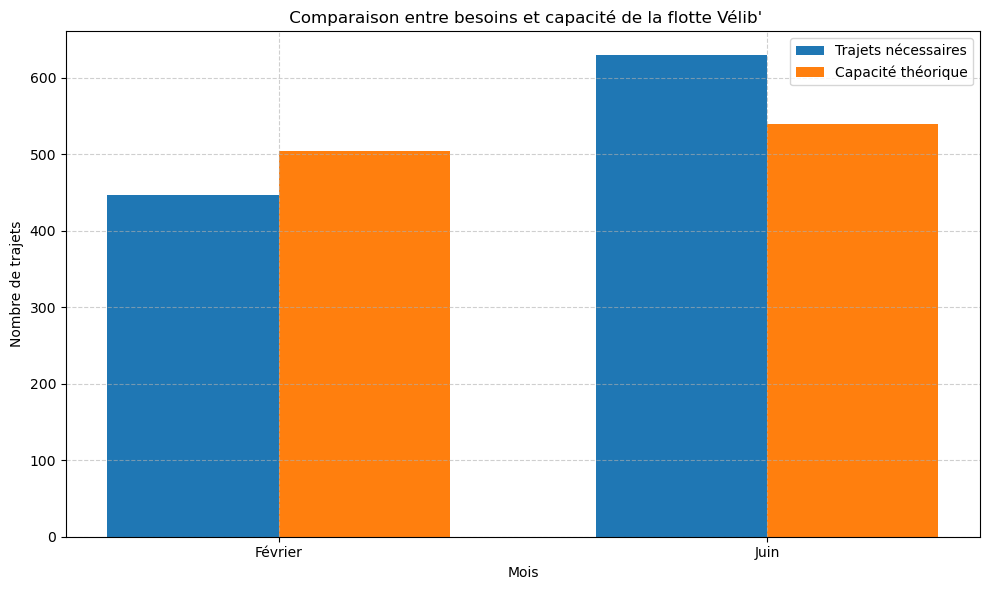

In [391]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Paramètres de flotte
capacite_camion = 7  # vélos par camion
nombre_camions = 9
capacite_totale = capacite_camion * nombre_camions  # 63 vélos

# 2. Données mensuelles
donnees = {
    "Mois": ["Février", "Juin"],
    "Vélos régulés": [9352, 10456],
    "Vélos ateliers (injectés + collectés)": [10625 + 8207, 15706 + 13463],
    "Total vélos déplacés": [9352 + 10625 + 8207, 10456 + 15706 + 13463],
    "Jours": [28, 30]
}

df = pd.DataFrame(donnees)
df["Trajets nécessaires"] = (df["Total vélos déplacés"] / capacite_totale).round()
df["Trajets max théoriques (2 par jour)"] = df["Jours"] * nombre_camions * 2  # 2 rotations/jour

# 3. Affichage du tableau
print(df[["Mois", "Total vélos déplacés", "Trajets nécessaires", "Trajets max théoriques (2 par jour)"]])

# 4. Visualisation
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df))

plt.bar(index, df["Trajets nécessaires"], width=bar_width, label="Trajets nécessaires")
plt.bar([i + bar_width for i in index], df["Trajets max théoriques (2 par jour)"], width=bar_width, label="Capacité théorique")

plt.xlabel("Mois")
plt.ylabel("Nombre de trajets")
plt.title(" Comparaison entre besoins et capacité de la flotte Vélib'")
plt.xticks([i + bar_width / 2 for i in index], df["Mois"])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [420]:
import pandas as pd
import unidecode
print(df_remplissage_fevrier.columns)
#  1. Nettoyage des noms dans df_fevrier (flux usagers)
def normaliser_nom(station):
    if pd.isna(station):
        return None
    return unidecode.unidecode(str(station).strip().lower())

df_fevrier['from_station'] = df_fevrier['from_stat'].apply(normaliser_nom)
df_fevrier['to_station'] = df_fevrier['to_stat'].apply(normaliser_nom)

# Moyenne des arrivées / départs par station (normalisée)
arrivees_fevrier = df_fevrier.groupby('to_station').size()
departs_fevrier = df_fevrier.groupby('from_station').size()

#  2. Nettoyage des noms dans df_remplissage_fevrier
df_remplissage_fevrier['station_clean'] = df_remplissage_fevrier['station_name'].apply(normaliser_nom)

# Calcul des moyennes par station (remplissage)
remplissage_fevrier = df_remplissage_fevrier.groupby('station_clean').agg({
    'VM_Av': 'mean',
    'VAE_AV': 'mean',
    'places_disponibles': 'mean'
})
remplissage_fevrier['velos_disponibles'] = remplissage_fevrier['VM_Av'] + remplissage_fevrier['VAE_AV']

#  3. Fusionner les deux sources via station_clean
df_flux_remplissage_fevrier = pd.DataFrame({
    'arrivees_moy': arrivees_fevrier,
    'departs_moy': departs_fevrier
}).join(remplissage_fevrier[['velos_disponibles', 'places_disponibles']], how='inner')

# Calcul des ratios d'utilisation
df_flux_remplissage_fevrier['ratio_arrivees_vs_places'] = df_flux_remplissage_fevrier['arrivees_moy'] / df_flux_remplissage_fevrier['places_disponibles']
df_flux_remplissage_fevrier['ratio_departs_vs_velos'] = df_flux_remplissage_fevrier['departs_moy'] / df_flux_remplissage_fevrier['velos_disponibles']

# Détection des stations critiques
seuil_arrivees = 10
seuil_departs = 10

df_critique_fevrier = df_flux_remplissage_fevrier[
    (df_flux_remplissage_fevrier['ratio_arrivees_vs_places'] > seuil_arrivees) |
    (df_flux_remplissage_fevrier['ratio_departs_vs_velos'] > seuil_departs)
].sort_values(by=['ratio_arrivees_vs_places', 'ratio_departs_vs_velos'], ascending=False)

# Résultat
df_critique_fevrier.head(15)


Index(['code_station', 'station_name', 'longitude', 'latitude', 'Date_Update',
       'VM_Av', 'VAE_AV', 'VM_Unav', 'VAE_Unav', 'places_disponibles',
       'VM_av_StatPlus', 'VAE_av_StatPlus', 'VM_Unav.1', 'VAE_Unav.1',
       'Cable_av', 'Heure', 'Jour', 'heure', 'velos_disponibles', 'capacite',
       'taux_remplissage', 'station_clean'],
      dtype='object')


,arrivees_moy,departs_moy,velos_disponibles,places_disponibles,ratio_arrivees_vs_places,ratio_departs_vs_velos
quai des celestins - henri iv,3824.0,3851.0,9.035868,3.638934,1050.857096,426.190358
place de l'hotel de ville,4204.0,4263.0,8.753920,4.168103,1008.612350,486.981830
strasbourg - saint-denis,4445.0,4494.0,9.951470,4.897346,907.634494,451.591565
traversiere - ledru-rollin,7872.0,7839.0,23.819544,8.716633,903.101042,329.099503
saint-antoine sevigne,6999.0,6968.0,15.881663,7.954600,879.868205,438.744974
pont neuf - rivoli,6538.0,6639.0,16.498381,8.260679,791.460377,402.403116
centre georges pompidou,6631.0,6646.0,15.679806,8.705876,761.669451,423.857298
lacuee - lyon,3506.0,3486.0,10.258223,4.689576,747.615535,339.824943
chabrol - d'hauteville,3365.0,3353.0,5.084186,4.584681,733.965939,659.495909
turbigo - francaise,3482.0,3531.0,9.942349,4.755065,732.271789,355.147465


## Modelisation Statiqtiques : Prédiction de l’état des stations (pleine/vide/normale) , Clustering des stations selon les usages


In [424]:
print(df_flux_remplissage_fevrier[["ratio_arrivees_vs_places", "ratio_departs_vs_velos"]].shape)
print(df_signalements_fevrier.shape)
print(indispos_fevrier.shape)
print(ecart_ateliers_fevrier.shape)
print(nb_regulations_fevrier.shape)


(1417, 2)
(607, 6)
(1417,)
(1380,)
(384,)


In [457]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Créer les variables manquantes
df_remplissage_juin['VM disponibles'] = pd.to_numeric(df_remplissage_juin['VM disponibles'], errors='coerce')
df_remplissage_juin['VAE disponibles'] = pd.to_numeric(df_remplissage_juin['VAE disponibles'], errors='coerce')
df_remplissage_juin['places_disponibles'] = pd.to_numeric(df_remplissage_juin['places_disponibles'], errors='coerce')
df_remplissage_juin['heure'] = pd.to_numeric(df_remplissage_juin['heure'], errors='coerce')

# Créer 'velos_disponibles' et 'capacite'
df_remplissage_juin['velos_disponibles'] = df_remplissage_juin['VM disponibles'] + df_remplissage_juin['VAE disponibles']
df_remplissage_juin['capacite'] = df_remplissage_juin['velos_disponibles'] + df_remplissage_juin['places_disponibles']

# Supprimer les lignes invalides
df_remplissage_juin = df_remplissage_juin.dropna(subset=['velos_disponibles', 'capacite', 'heure'])

# Calcul du taux
df_remplissage_juin['taux_remplissage'] = df_remplissage_juin['velos_disponibles'] / df_remplissage_juin['capacite']




In [464]:
def classer_station(taux):
    if taux < 0.2:
        return 'VIDE'
    elif taux > 0.8:
        return 'PLEINE'
    else:
        return 'NORMALE'

df_remplissage_juin['statut'] = df_remplissage_juin['taux_remplissage'].apply(classer_station)


In [466]:
# Features et target
X = df_remplissage_juin[['heure', 'velos_disponibles', 'capacite']]
y = df_remplissage_juin['statut']

# Split & modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Résultat
print("Répartition des classes :")
print(y.value_counts())
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))import matplotlib.pyplot as plt

df_remplissage_juin['statut'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['red','green','orange'])
plt.title("Répartition des statuts de stations")
plt.ylabel("")
plt.show()


Répartition des classes :
statut
NORMALE    3262429
VIDE       2448814
PLEINE      842931
Name: count, dtype: int64

Rapport de classification :
              precision    recall  f1-score   support

     NORMALE       1.00      1.00      1.00    978664
      PLEINE       1.00      1.00      1.00    252802
        VIDE       1.00      1.00      1.00    734787

    accuracy                           1.00   1966253
   macro avg       1.00      1.00      1.00   1966253
weighted avg       1.00      1.00      1.00   1966253



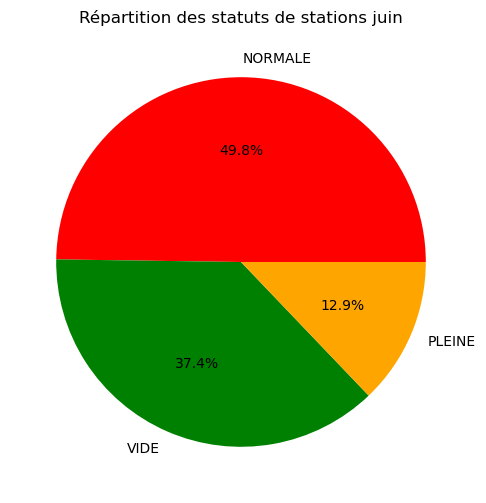

In [470]:
df_remplissage_juin['statut'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=['red','green','orange'])
plt.title("Répartition des statuts de stations juin")
plt.ylabel("")
plt.show()


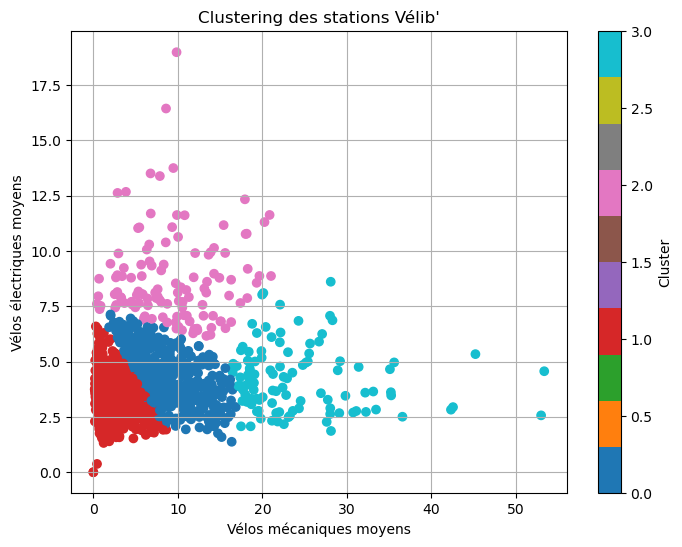

In [472]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# On part de df_remplissage_juin ou df_remplissage_fevrier
df = df_remplissage_juin  # ou df_remplissage_fevrier

# Calcul des vélos totaux disponibles
df['velos_disponibles'] = df['VM disponibles'] + df['VAE disponibles']

# Moyennes par station
station_stats = df.groupby("Nom station")[["VM disponibles", "VAE disponibles", "velos_disponibles"]].mean()

# Optionnel : normaliser les données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
station_scaled = scaler.fit_transform(station_stats)

# Appliquer KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
station_stats["cluster"] = kmeans.fit_predict(station_scaled)

# Visualisation
plt.figure(figsize=(8,6))
plt.scatter(station_stats["VM disponibles"], station_stats["VAE disponibles"], c=station_stats["cluster"], cmap="tab10")
plt.xlabel("Vélos mécaniques moyens")
plt.ylabel("Vélos électriques moyens")
plt.title("Clustering des stations Vélib'")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()



/var/folders/v4/mq90pf9s04g995xgrt9dp8qh0000gn/T/ipykernel_71765/2029406060.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cluster_remplissage, x='cluster', y='taux_remplissage', palette='Set2')


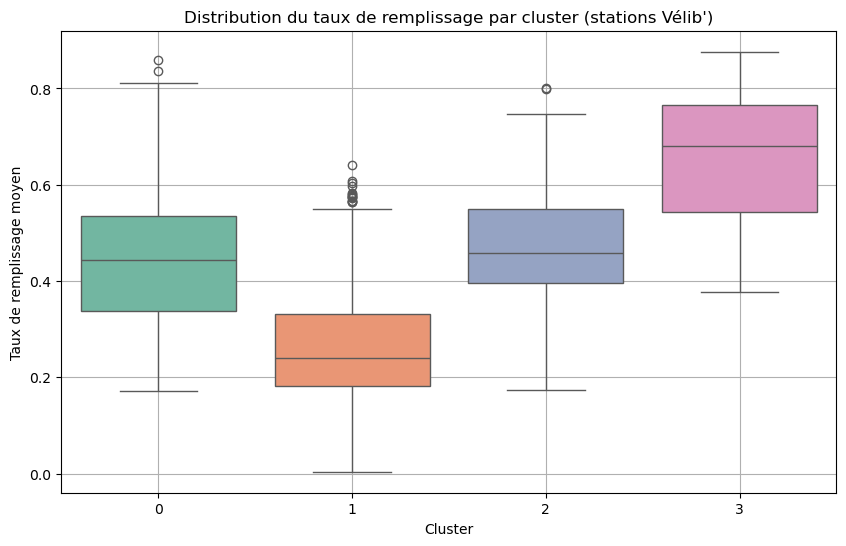

In [476]:

# station_stats = df.groupby("Nom station")[["VM disponibles", "VAE disponibles"]].mean()
# + clustering → station_stats["cluster"]

# 2. Calculer taux de remplissage moyen par station
df_remplissage_juin['velos_disponibles'] = df_remplissage_juin['VM disponibles'] + df_remplissage_juin['VAE disponibles']
df_remplissage_juin['capacite'] = df_remplissage_juin['velos_disponibles'] + df_remplissage_juin['places_disponibles']
df_remplissage_juin['taux_remplissage'] = df_remplissage_juin['velos_disponibles'] / df_remplissage_juin['capacite']

remplissage_moyen = df_remplissage_juin.groupby("Nom station")['taux_remplissage'].mean().reset_index()

# 3. Fusionner avec les clusters
station_stats_reset = station_stats.reset_index()
df_cluster_remplissage = pd.merge(station_stats_reset, remplissage_moyen, on='Nom station')

# 4. Visualisation : remplissage moyen par cluster
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cluster_remplissage, x='cluster', y='taux_remplissage', palette='Set2')
plt.title("Distribution du taux de remplissage par cluster (stations Vélib')")
plt.xlabel("Cluster")
plt.ylabel("Taux de remplissage moyen")
plt.grid(True)
plt.show()


In [478]:
# Fixons un seuil de "faible remplissage" (ex : < 0.4)
seuil_remplissage = 0.4

# Identifier les clusters avec une bonne moyenne de vélos
# → ex: seuil à 10 vélos (mécaniques + électriques)
station_stats["total_velos_moyens"] = station_stats["VM disponibles"] + station_stats["VAE disponibles"]
clusters_fort_potentiel = station_stats.groupby("cluster")["total_velos_moyens"].mean()
clusters_bons = clusters_fort_potentiel[clusters_fort_potentiel > 10].index.tolist()

# Joindre avec taux de remplissage
df_analyse = pd.merge(station_stats.reset_index(), remplissage_moyen, on="Nom station")

# Filtrer les stations problématiques
stations_problemes = df_analyse[
    (df_analyse['cluster'].isin(clusters_bons)) &
    (df_analyse['taux_remplissage'] < seuil_remplissage)
]

print("Nombre de stations à fort potentiel mais mal remplies :", stations_problemes.shape[0])
print(stations_problemes[['Nom station', 'cluster', 'total_velos_moyens', 'taux_remplissage']].head())


Nombre de stations à fort potentiel mais mal remplies : 230
                                   Nom station  cluster  total_velos_moyens  \
0                11 Novembre 1918 - 8 Mai 1945        0            8.869565   
7            Adolphe Lalyre - Armand Silvestre        0           12.046672   
9               Adrien Lesesne - Docteur Bauer        0           10.533430   
12                  Alexandre Dumas - Voltaire        2           20.066709   
15  Alfred de Vigny - Place du Général Brocard        0           10.855149   

    taux_remplissage  
0           0.248246  
7           0.313438  
9           0.384310  
12          0.356578  
15          0.360817  


In [488]:
# On cherche à savoir si les regulations faites correspondent bien aux station qui en ont le plus besoin comparaison :
# Top 10 stations les plus en départ (besoin réel) VS top 10 stations les plus rechargées (régulation)

# Besoin réel
top_dep = df_juin['from_stat'].value_counts().head(10)

# Stations les plus souvent réapprovisionnées (depuis fichier régulation)
top_reappro = df_ateliers_stations_juin['Nom station dépose'].value_counts().head(10)

# Comparaison visuelle
pd.DataFrame({
    'Top départs (usagers)': top_dep,
    'Top réappro (régulation)': top_reappro
}).fillna(0)

,Top départs (usagers),Top réappro (régulation)
Bobillot - Paulin Mery,0.0,23.0
Clichy - Douai,0.0,15.0
Crozatier - Faubourg Saint-Antoine,10922.0,0.0
Gare RER de Vincennes,11943.0,0.0
Gare Saint-Lazare - Cour du Havre,15482.0,0.0
Gare de Lyon - Place Louis Armand,14597.0,0.0
Italie - Jardin Joan Miro,0.0,14.0
Pau Casals - Neuve Tolbiac,11354.0,0.0
Place Mireille Havet,12785.0,0.0
Place d'Italie - Soeur Rosalie,0.0,26.0


In [486]:
print(df_ateliers_stations_juin.columns.tolist())

['Nom station dépose', 'Latitude station dépose', 'Longitude station dépose', 'Total', 'VAE', 'VM', 'date', 'station_clean']
